# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Prepare these arrays for stopword-checking.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            lemmas = substitution.source.lemmas[dslice]
            tokens = substitution.source.tokens[dslice]
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token) in enumerate(zip(words, lemmas, tokens)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': substitution.tags[0],
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 63446 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 63446) |           | Elapsed Time: 0:00:03 ETA:  2 days, 15:57:45

  0% (  123 of 63446) |                    | Elapsed Time: 0:00:04 ETA:  0:08:38

  0% (  240 of 63446) |                    | Elapsed Time: 0:00:05 ETA:  0:08:47

  0% (  325 of 63446) |                    | Elapsed Time: 0:00:06 ETA:  0:09:42

  0% (  436 of 63446) |                    | Elapsed Time: 0:00:07 ETA:  0:09:38

  0% (  543 of 63446) |                    | Elapsed Time: 0:00:08 ETA:  0:09:39

  1% (  658 of 63446) |                    | Elapsed Time: 0:00:09 ETA:  0:09:32

  1% (  771 of 63446) |                    | Elapsed Time: 0:00:10 ETA:  0:09:28

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:10 ETA:  0:09:27

  1% (  907 of 63446) |                    | Elapsed Time: 0:00:11 ETA:  0:09:25

  1% ( 1023 of 63446) |                    | Elapsed Time: 0:00:12 ETA:  0:09:28

  1% ( 1141 of 63446) |                    | Elapsed Time: 0:00:13 ETA:  0:09:26

  1% ( 1257 of 63446) |                    | Elapsed Time: 0:00:14 ETA:  0:09:05

  2% ( 1367 of 63446) |                    | Elapsed Time: 0:00:15 ETA:  0:09:05

  2% ( 1481 of 63446) |                    | Elapsed Time: 0:00:16 ETA:  0:09:00

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:17 ETA:  0:09:00

  2% ( 1703 of 63446) |                    | Elapsed Time: 0:00:18 ETA:  0:08:57

  2% ( 1814 of 63446) |                    | Elapsed Time: 0:00:19 ETA:  0:08:58

  3% ( 1910 of 63446) |                    | Elapsed Time: 0:00:20 ETA:  0:09:06

  3% ( 2027 of 63446) |                    | Elapsed Time: 0:00:21 ETA:  0:09:04

  3% ( 2137 of 63446) |                    | Elapsed Time: 0:00:22 ETA:  0:09:08

  3% ( 2245 of 63446) |                    | Elapsed Time: 0:00:23 ETA:  0:09:12

  3% ( 2318 of 63446) |                    | Elapsed Time: 0:00:24 ETA:  0:09:33

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:00:25 ETA:  0:09:44

  3% ( 2455 of 63446) |                    | Elapsed Time: 0:00:26 ETA:  0:10:09

  4% ( 2538 of 63446) |                    | Elapsed Time: 0:00:27 ETA:  0:10:33

  4% ( 2624 of 63446) |                    | Elapsed Time: 0:00:28 ETA:  0:10:53

  4% ( 2705 of 63446) |                    | Elapsed Time: 0:00:29 ETA:  0:11:05

  4% ( 2787 of 63446) |                    | Elapsed Time: 0:00:30 ETA:  0:11:36

  4% ( 2876 of 63446) |                    | Elapsed Time: 0:00:31 ETA:  0:11:56

  4% ( 2967 of 63446) |                    | Elapsed Time: 0:00:32 ETA:  0:12:13

  4% ( 3056 of 63446) |                    | Elapsed Time: 0:00:33 ETA:  0:11:55

  4% ( 3143 of 63446) |                    | Elapsed Time: 0:00:34 ETA:  0:11:56

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:00:34 ETA:  0:11:46

  5% ( 3264 of 63446) |#                   | Elapsed Time: 0:00:35 ETA:  0:11:37

  5% ( 3355 of 63446) |#                   | Elapsed Time: 0:00:36 ETA:  0:11:31

  5% ( 3461 of 63446) |#                   | Elapsed Time: 0:00:37 ETA:  0:11:06

  5% ( 3570 of 63446) |#                   | Elapsed Time: 0:00:38 ETA:  0:10:41

  5% ( 3697 of 63446) |#                   | Elapsed Time: 0:00:39 ETA:  0:10:08

  6% ( 3824 of 63446) |#                   | Elapsed Time: 0:00:40 ETA:  0:09:40

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:00:42 ETA:  0:08:58

  6% ( 4091 of 63446) |#                   | Elapsed Time: 0:00:43 ETA:  0:08:42

  6% ( 4214 of 63446) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:22

  6% ( 4335 of 63446) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:03

  7% ( 4461 of 63446) |#                   | Elapsed Time: 0:00:46 ETA:  0:07:51

  7% ( 4584 of 63446) |#                   | Elapsed Time: 0:00:47 ETA:  0:07:43

  7% ( 4707 of 63446) |#                   | Elapsed Time: 0:00:48 ETA:  0:07:44

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:00:48 ETA:  0:07:46

  7% ( 4832 of 63446) |#                   | Elapsed Time: 0:00:49 ETA:  0:08:14

  7% ( 4936 of 63446) |#                   | Elapsed Time: 0:00:50 ETA:  0:08:21

  7% ( 5046 of 63446) |#                   | Elapsed Time: 0:00:51 ETA:  0:08:29

  8% ( 5156 of 63446) |#                   | Elapsed Time: 0:00:52 ETA:  0:08:36

  8% ( 5268 of 63446) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:41

  8% ( 5375 of 63446) |#                   | Elapsed Time: 0:00:54 ETA:  0:08:53

  8% ( 5491 of 63446) |#                   | Elapsed Time: 0:00:55 ETA:  0:08:56

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:00:56 ETA:  0:09:04

  8% ( 5663 of 63446) |#                   | Elapsed Time: 0:00:57 ETA:  0:09:04

  9% ( 5780 of 63446) |#                   | Elapsed Time: 0:00:58 ETA:  0:08:35

  9% ( 5896 of 63446) |#                   | Elapsed Time: 0:00:59 ETA:  0:08:27

  9% ( 6008 of 63446) |#                   | Elapsed Time: 0:01:00 ETA:  0:08:25

  9% ( 6122 of 63446) |#                   | Elapsed Time: 0:01:01 ETA:  0:08:21

  9% ( 6230 of 63446) |#                   | Elapsed Time: 0:01:02 ETA:  0:08:23

  9% ( 6319 of 63446) |#                   | Elapsed Time: 0:01:03 ETA:  0:08:32

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:03 ETA:  0:08:45

 10% ( 6419 of 63446) |##                  | Elapsed Time: 0:01:04 ETA:  0:09:10

 10% ( 6493 of 63446) |##                  | Elapsed Time: 0:01:05 ETA:  0:09:36

 10% ( 6568 of 63446) |##                  | Elapsed Time: 0:01:06 ETA:  0:10:10

 10% ( 6644 of 63446) |##                  | Elapsed Time: 0:01:07 ETA:  0:10:46

 10% ( 6732 of 63446) |##                  | Elapsed Time: 0:01:08 ETA:  0:11:08

 10% ( 6806 of 63446) |##                  | Elapsed Time: 0:01:09 ETA:  0:11:50

 10% ( 6886 of 63446) |##                  | Elapsed Time: 0:01:10 ETA:  0:12:23

 10% ( 6970 of 63446) |##                  | Elapsed Time: 0:01:11 ETA:  0:12:27

 11% ( 7058 of 63446) |##                  | Elapsed Time: 0:01:12 ETA:  0:12:12

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:13 ETA:  0:11:50

 11% ( 7258 of 63446) |##                  | Elapsed Time: 0:01:14 ETA:  0:11:02

 11% ( 7366 of 63446) |##                  | Elapsed Time: 0:01:15 ETA:  0:10:30

 11% ( 7469 of 63446) |##                  | Elapsed Time: 0:01:16 ETA:  0:10:06

 11% ( 7547 of 63446) |##                  | Elapsed Time: 0:01:17 ETA:  0:10:14

 12% ( 7641 of 63446) |##                  | Elapsed Time: 0:01:18 ETA:  0:09:57

 12% ( 7689 of 63446) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:22

 12% ( 7783 of 63446) |##                  | Elapsed Time: 0:01:20 ETA:  0:10:13

 12% ( 7880 of 63446) |##                  | Elapsed Time: 0:01:21 ETA:  0:10:04

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:01:21 ETA:  0:09:55

 12% ( 8054 of 63446) |##                  | Elapsed Time: 0:01:22 ETA:  0:09:51

 12% ( 8165 of 63446) |##                  | Elapsed Time: 0:01:23 ETA:  0:09:47

 13% ( 8276 of 63446) |##                  | Elapsed Time: 0:01:24 ETA:  0:09:39

 13% ( 8389 of 63446) |##                  | Elapsed Time: 0:01:25 ETA:  0:09:10

 13% ( 8500 of 63446) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:57

 13% ( 8613 of 63446) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:12

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:00

 13% ( 8838 of 63446) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:49

 14% ( 8948 of 63446) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:52

 14% ( 9060 of 63446) |##                  | Elapsed Time: 0:01:31 ETA:  0:07:57

 14% ( 9171 of 63446) |##                  | Elapsed Time: 0:01:32 ETA:  0:07:56

 14% ( 9284 of 63446) |##                  | Elapsed Time: 0:01:33 ETA:  0:07:55

 14% ( 9394 of 63446) |##                  | Elapsed Time: 0:01:34 ETA:  0:07:55

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:01:36 ETA:  0:07:53

 15% ( 9629 of 63446) |###                 | Elapsed Time: 0:01:37 ETA:  0:07:52

 15% ( 9742 of 63446) |###                 | Elapsed Time: 0:01:38 ETA:  0:07:51

 15% ( 9855 of 63446) |###                 | Elapsed Time: 0:01:39 ETA:  0:07:49

 15% ( 9966 of 63446) |###                 | Elapsed Time: 0:01:40 ETA:  0:07:48

 15% (10078 of 63446) |###                 | Elapsed Time: 0:01:41 ETA:  0:07:46

 16% (10191 of 63446) |###                 | Elapsed Time: 0:01:42 ETA:  0:07:45

 16% (10310 of 63446) |###                 | Elapsed Time: 0:01:43 ETA:  0:07:40

 16% (10430 of 63446) |###                 | Elapsed Time: 0:01:44 ETA:  0:07:35

 16% (10547 of 63446) |###                 | Elapsed Time: 0:01:45 ETA:  0:07:31

 16% (10664 of 63446) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:28

 16% (10778 of 63446) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:26

 17% (10895 of 63446) |###                 | Elapsed Time: 0:01:48 ETA:  0:07:22

 17% (11016 of 63446) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:16

 17% (11104 of 63446) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:10

 17% (11223 of 63446) |###                 | Elapsed Time: 0:01:50 ETA:  0:07:08

 17% (11340 of 63446) |###                 | Elapsed Time: 0:01:51 ETA:  0:07:07

 18% (11458 of 63446) |###                 | Elapsed Time: 0:01:52 ETA:  0:07:07

 18% (11553 of 63446) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:42

 18% (11666 of 63446) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:43

 18% (11784 of 63446) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:40

 18% (11897 of 63446) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:38

 18% (12018 of 63446) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:37

 19% (12137 of 63446) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:37

 19% (12258 of 63446) |###                 | Elapsed Time: 0:02:00 ETA:  0:07:35

 19% (12374 of 63446) |###                 | Elapsed Time: 0:02:01 ETA:  0:07:34

 19% (12496 of 63446) |###                 | Elapsed Time: 0:02:02 ETA:  0:07:31

 19% (12616 of 63446) |###                 | Elapsed Time: 0:02:03 ETA:  0:06:54

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:03 ETA:  0:06:49

 20% (12810 of 63446) |####                | Elapsed Time: 0:02:04 ETA:  0:06:47

 20% (12929 of 63446) |####                | Elapsed Time: 0:02:05 ETA:  0:06:46

 20% (13048 of 63446) |####                | Elapsed Time: 0:02:06 ETA:  0:06:46

 20% (13167 of 63446) |####                | Elapsed Time: 0:02:07 ETA:  0:06:44

 20% (13287 of 63446) |####                | Elapsed Time: 0:02:08 ETA:  0:06:44

 21% (13406 of 63446) |####                | Elapsed Time: 0:02:09 ETA:  0:06:42

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:10 ETA:  0:06:42

 21% (13601 of 63446) |####                | Elapsed Time: 0:02:11 ETA:  0:06:42

 21% (13716 of 63446) |####                | Elapsed Time: 0:02:12 ETA:  0:06:44

 21% (13829 of 63446) |####                | Elapsed Time: 0:02:13 ETA:  0:06:47

 21% (13939 of 63446) |####                | Elapsed Time: 0:02:14 ETA:  0:06:51

 22% (14055 of 63446) |####                | Elapsed Time: 0:02:15 ETA:  0:06:51

 22% (14144 of 63446) |####                | Elapsed Time: 0:02:16 ETA:  0:07:07

 22% (14232 of 63446) |####                | Elapsed Time: 0:02:17 ETA:  0:07:25

 22% (14276 of 63446) |####                | Elapsed Time: 0:02:18 ETA:  0:07:39

 22% (14363 of 63446) |####                | Elapsed Time: 0:02:19 ETA:  0:07:57

 22% (14448 of 63446) |####                | Elapsed Time: 0:02:20 ETA:  0:08:21

 22% (14533 of 63446) |####                | Elapsed Time: 0:02:21 ETA:  0:08:45

 23% (14622 of 63446) |####                | Elapsed Time: 0:02:22 ETA:  0:09:04

 23% (14712 of 63446) |####                | Elapsed Time: 0:02:23 ETA:  0:09:22

 23% (14802 of 63446) |####                | Elapsed Time: 0:02:24 ETA:  0:09:46

 23% (14886 of 63446) |####                | Elapsed Time: 0:02:25 ETA:  0:09:49

 23% (14987 of 63446) |####                | Elapsed Time: 0:02:26 ETA:  0:09:35

 23% (15069 of 63446) |####                | Elapsed Time: 0:02:26 ETA:  0:09:16

 23% (15184 of 63446) |####                | Elapsed Time: 0:02:27 ETA:  0:08:51

 24% (15300 of 63446) |####                | Elapsed Time: 0:02:28 ETA:  0:08:24

 24% (15411 of 63446) |####                | Elapsed Time: 0:02:29 ETA:  0:08:02

 24% (15519 of 63446) |####                | Elapsed Time: 0:02:30 ETA:  0:07:48

 24% (15626 of 63446) |####                | Elapsed Time: 0:02:31 ETA:  0:07:34

 24% (15736 of 63446) |####                | Elapsed Time: 0:02:32 ETA:  0:07:20

 25% (15862 of 63446) |#####               | Elapsed Time: 0:02:33 ETA:  0:06:55

 25% (15975 of 63446) |#####               | Elapsed Time: 0:02:34 ETA:  0:06:54

 25% (16087 of 63446) |#####               | Elapsed Time: 0:02:35 ETA:  0:06:56

 25% (16200 of 63446) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:57

 25% (16235 of 63446) |#####               | Elapsed Time: 0:02:38 ETA:  0:07:49

 25% (16346 of 63446) |#####               | Elapsed Time: 0:02:39 ETA:  0:07:46

 25% (16450 of 63446) |#####               | Elapsed Time: 0:02:40 ETA:  0:07:47

 26% (16554 of 63446) |#####               | Elapsed Time: 0:02:41 ETA:  0:07:51

 26% (16655 of 63446) |#####               | Elapsed Time: 0:02:41 ETA:  0:07:55

 26% (16753 of 63446) |#####               | Elapsed Time: 0:02:42 ETA:  0:07:57

 26% (16853 of 63446) |#####               | Elapsed Time: 0:02:43 ETA:  0:08:06

 26% (16953 of 63446) |#####               | Elapsed Time: 0:02:44 ETA:  0:08:14

 26% (17054 of 63446) |#####               | Elapsed Time: 0:02:45 ETA:  0:08:22

 27% (17160 of 63446) |#####               | Elapsed Time: 0:02:47 ETA:  0:07:30

 27% (17265 of 63446) |#####               | Elapsed Time: 0:02:48 ETA:  0:07:33

 27% (17359 of 63446) |#####               | Elapsed Time: 0:02:49 ETA:  0:07:39

 27% (17448 of 63446) |#####               | Elapsed Time: 0:02:49 ETA:  0:07:45

 27% (17537 of 63446) |#####               | Elapsed Time: 0:02:50 ETA:  0:07:57

 27% (17635 of 63446) |#####               | Elapsed Time: 0:02:51 ETA:  0:07:56

 27% (17746 of 63446) |#####               | Elapsed Time: 0:02:52 ETA:  0:07:46

 28% (17854 of 63446) |#####               | Elapsed Time: 0:02:53 ETA:  0:07:39

 28% (17956 of 63446) |#####               | Elapsed Time: 0:02:54 ETA:  0:07:37

 28% (18069 of 63446) |#####               | Elapsed Time: 0:02:56 ETA:  0:07:31

 28% (18189 of 63446) |#####               | Elapsed Time: 0:02:57 ETA:  0:07:20

 28% (18241 of 63446) |#####               | Elapsed Time: 0:02:57 ETA:  0:07:08

 28% (18360 of 63446) |#####               | Elapsed Time: 0:02:58 ETA:  0:06:51

 29% (18480 of 63446) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:30

 29% (18597 of 63446) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:17

 29% (18717 of 63446) |#####               | Elapsed Time: 0:03:01 ETA:  0:06:11

 29% (18837 of 63446) |#####               | Elapsed Time: 0:03:02 ETA:  0:06:03

 29% (18957 of 63446) |#####               | Elapsed Time: 0:03:03 ETA:  0:05:53

 30% (19034 of 63446) |######              | Elapsed Time: 0:03:04 ETA:  0:05:48

 30% (19155 of 63446) |######              | Elapsed Time: 0:03:05 ETA:  0:05:47

 30% (19276 of 63446) |######              | Elapsed Time: 0:03:06 ETA:  0:05:45

 30% (19393 of 63446) |######              | Elapsed Time: 0:03:07 ETA:  0:05:45

 30% (19492 of 63446) |######              | Elapsed Time: 0:03:08 ETA:  0:05:56

 30% (19613 of 63446) |######              | Elapsed Time: 0:03:09 ETA:  0:05:52

 31% (19736 of 63446) |######              | Elapsed Time: 0:03:10 ETA:  0:05:50

 31% (19827 of 63446) |######              | Elapsed Time: 0:03:11 ETA:  0:06:12

 31% (19930 of 63446) |######              | Elapsed Time: 0:03:12 ETA:  0:06:21

 31% (20026 of 63446) |######              | Elapsed Time: 0:03:13 ETA:  0:06:36

 31% (20128 of 63446) |######              | Elapsed Time: 0:03:14 ETA:  0:06:48

 31% (20234 of 63446) |######              | Elapsed Time: 0:03:15 ETA:  0:06:55

 32% (20353 of 63446) |######              | Elapsed Time: 0:03:16 ETA:  0:06:40

 32% (20477 of 63446) |######              | Elapsed Time: 0:03:17 ETA:  0:06:37

 32% (20568 of 63446) |######              | Elapsed Time: 0:03:18 ETA:  0:06:59

 32% (20620 of 63446) |######              | Elapsed Time: 0:03:18 ETA:  0:06:44

 32% (20731 of 63446) |######              | Elapsed Time: 0:03:19 ETA:  0:06:38

 32% (20841 of 63446) |######              | Elapsed Time: 0:03:20 ETA:  0:06:32

 33% (20944 of 63446) |######              | Elapsed Time: 0:03:21 ETA:  0:06:27

 33% (21050 of 63446) |######              | Elapsed Time: 0:03:22 ETA:  0:06:23

 33% (21150 of 63446) |######              | Elapsed Time: 0:03:23 ETA:  0:06:26

 33% (21245 of 63446) |######              | Elapsed Time: 0:03:24 ETA:  0:06:41

 33% (21347 of 63446) |######              | Elapsed Time: 0:03:25 ETA:  0:06:56

 33% (21414 of 63446) |######              | Elapsed Time: 0:03:26 ETA:  0:06:46

 33% (21430 of 63446) |######              | Elapsed Time: 0:03:27 ETA:  0:07:53

 33% (21539 of 63446) |######              | Elapsed Time: 0:03:28 ETA:  0:07:54

 34% (21655 of 63446) |######              | Elapsed Time: 0:03:29 ETA:  0:07:49

 34% (21754 of 63446) |######              | Elapsed Time: 0:03:30 ETA:  0:07:52

 34% (21860 of 63446) |######              | Elapsed Time: 0:03:31 ETA:  0:07:50

 34% (21967 of 63446) |######              | Elapsed Time: 0:03:32 ETA:  0:07:43

 34% (22067 of 63446) |######              | Elapsed Time: 0:03:33 ETA:  0:07:38

 34% (22164 of 63446) |######              | Elapsed Time: 0:03:34 ETA:  0:07:40

 35% (22207 of 63446) |#######             | Elapsed Time: 0:03:34 ETA:  0:07:40

 35% (22316 of 63446) |#######             | Elapsed Time: 0:03:35 ETA:  0:06:29

 35% (22433 of 63446) |#######             | Elapsed Time: 0:03:36 ETA:  0:06:22

 35% (22549 of 63446) |#######             | Elapsed Time: 0:03:37 ETA:  0:06:20

 35% (22660 of 63446) |#######             | Elapsed Time: 0:03:38 ETA:  0:06:12

 35% (22762 of 63446) |#######             | Elapsed Time: 0:03:39 ETA:  0:06:14

 36% (22892 of 63446) |#######             | Elapsed Time: 0:03:40 ETA:  0:05:58

 36% (23000 of 63446) |#######             | Elapsed Time: 0:03:41 ETA:  0:05:46

 36% (23124 of 63446) |#######             | Elapsed Time: 0:03:42 ETA:  0:05:30

 36% (23235 of 63446) |#######             | Elapsed Time: 0:03:43 ETA:  0:05:29

 36% (23313 of 63446) |#######             | Elapsed Time: 0:03:44 ETA:  0:05:45

 36% (23410 of 63446) |#######             | Elapsed Time: 0:03:45 ETA:  0:05:56

 37% (23497 of 63446) |#######             | Elapsed Time: 0:03:46 ETA:  0:06:13

 37% (23581 of 63446) |#######             | Elapsed Time: 0:03:47 ETA:  0:06:29

 37% (23676 of 63446) |#######             | Elapsed Time: 0:03:48 ETA:  0:06:33

 37% (23793 of 63446) |#######             | Elapsed Time: 0:03:49 ETA:  0:06:55

 37% (23902 of 63446) |#######             | Elapsed Time: 0:03:50 ETA:  0:07:06

 37% (24011 of 63446) |#######             | Elapsed Time: 0:03:51 ETA:  0:07:07

 38% (24111 of 63446) |#######             | Elapsed Time: 0:03:52 ETA:  0:06:48

 38% (24213 of 63446) |#######             | Elapsed Time: 0:03:53 ETA:  0:06:43

 38% (24301 of 63446) |#######             | Elapsed Time: 0:03:54 ETA:  0:06:40

 38% (24394 of 63446) |#######             | Elapsed Time: 0:03:55 ETA:  0:06:32

 38% (24515 of 63446) |#######             | Elapsed Time: 0:03:56 ETA:  0:06:12

 38% (24586 of 63446) |#######             | Elapsed Time: 0:03:57 ETA:  0:06:17

 38% (24708 of 63446) |#######             | Elapsed Time: 0:03:58 ETA:  0:06:03

 39% (24834 of 63446) |#######             | Elapsed Time: 0:03:59 ETA:  0:05:51

 39% (24942 of 63446) |#######             | Elapsed Time: 0:04:00 ETA:  0:05:51

 39% (25040 of 63446) |#######             | Elapsed Time: 0:04:01 ETA:  0:05:51

 39% (25124 of 63446) |#######             | Elapsed Time: 0:04:02 ETA:  0:06:02

 39% (25201 of 63446) |#######             | Elapsed Time: 0:04:03 ETA:  0:06:08

 39% (25281 of 63446) |#######             | Elapsed Time: 0:04:04 ETA:  0:06:16

 40% (25379 of 63446) |########            | Elapsed Time: 0:04:05 ETA:  0:06:48

 40% (25478 of 63446) |########            | Elapsed Time: 0:04:06 ETA:  0:07:07

 40% (25578 of 63446) |########            | Elapsed Time: 0:04:07 ETA:  0:07:29

 40% (25692 of 63446) |########            | Elapsed Time: 0:04:08 ETA:  0:07:23

 40% (25813 of 63446) |########            | Elapsed Time: 0:04:09 ETA:  0:07:02

 40% (25921 of 63446) |########            | Elapsed Time: 0:04:10 ETA:  0:06:41

 41% (26040 of 63446) |########            | Elapsed Time: 0:04:11 ETA:  0:06:07

 41% (26172 of 63446) |########            | Elapsed Time: 0:04:12 ETA:  0:05:22

 41% (26292 of 63446) |########            | Elapsed Time: 0:04:13 ETA:  0:05:15

 41% (26394 of 63446) |########            | Elapsed Time: 0:04:14 ETA:  0:05:12

 41% (26489 of 63446) |########            | Elapsed Time: 0:04:15 ETA:  0:05:14

 41% (26588 of 63446) |########            | Elapsed Time: 0:04:16 ETA:  0:05:23

 42% (26709 of 63446) |########            | Elapsed Time: 0:04:17 ETA:  0:05:21

 42% (26831 of 63446) |########            | Elapsed Time: 0:04:18 ETA:  0:05:12

 42% (26965 of 63446) |########            | Elapsed Time: 0:04:20 ETA:  0:05:12

 42% (27084 of 63446) |########            | Elapsed Time: 0:04:21 ETA:  0:05:07

 42% (27194 of 63446) |########            | Elapsed Time: 0:04:22 ETA:  0:05:13

 43% (27291 of 63446) |########            | Elapsed Time: 0:04:23 ETA:  0:05:15

 43% (27397 of 63446) |########            | Elapsed Time: 0:04:24 ETA:  0:05:06

 43% (27503 of 63446) |########            | Elapsed Time: 0:04:25 ETA:  0:05:01

 43% (27589 of 63446) |########            | Elapsed Time: 0:04:26 ETA:  0:05:23

 43% (27688 of 63446) |########            | Elapsed Time: 0:04:27 ETA:  0:05:38

 43% (27758 of 63446) |########            | Elapsed Time: 0:04:28 ETA:  0:07:06

 43% (27859 of 63446) |########            | Elapsed Time: 0:04:29 ETA:  0:07:22

 44% (27961 of 63446) |########            | Elapsed Time: 0:04:30 ETA:  0:07:27

 44% (28070 of 63446) |########            | Elapsed Time: 0:04:31 ETA:  0:07:16

 44% (28176 of 63446) |########            | Elapsed Time: 0:04:32 ETA:  0:07:14

 44% (28276 of 63446) |########            | Elapsed Time: 0:04:33 ETA:  0:07:19

 44% (28378 of 63446) |########            | Elapsed Time: 0:04:34 ETA:  0:07:03

 44% (28480 of 63446) |########            | Elapsed Time: 0:04:35 ETA:  0:07:00

 45% (28551 of 63446) |#########           | Elapsed Time: 0:04:36 ETA:  0:05:41

 45% (28652 of 63446) |#########           | Elapsed Time: 0:04:37 ETA:  0:05:42

 45% (28780 of 63446) |#########           | Elapsed Time: 0:04:38 ETA:  0:05:23

 45% (28920 of 63446) |#########           | Elapsed Time: 0:04:39 ETA:  0:04:58

 45% (29034 of 63446) |#########           | Elapsed Time: 0:04:40 ETA:  0:04:54

 45% (29133 of 63446) |#########           | Elapsed Time: 0:04:41 ETA:  0:04:57

 46% (29221 of 63446) |#########           | Elapsed Time: 0:04:42 ETA:  0:05:04

 46% (29317 of 63446) |#########           | Elapsed Time: 0:04:43 ETA:  0:05:06

 46% (29344 of 63446) |#########           | Elapsed Time: 0:04:43 ETA:  0:05:04

 46% (29441 of 63446) |#########           | Elapsed Time: 0:04:44 ETA:  0:05:07

 46% (29561 of 63446) |#########           | Elapsed Time: 0:04:45 ETA:  0:04:54

 46% (29689 of 63446) |#########           | Elapsed Time: 0:04:46 ETA:  0:04:53

 46% (29808 of 63446) |#########           | Elapsed Time: 0:04:47 ETA:  0:05:06

 47% (29937 of 63446) |#########           | Elapsed Time: 0:04:48 ETA:  0:04:55

 47% (30070 of 63446) |#########           | Elapsed Time: 0:04:49 ETA:  0:04:32

 47% (30137 of 63446) |#########           | Elapsed Time: 0:04:50 ETA:  0:04:10

 47% (30241 of 63446) |#########           | Elapsed Time: 0:04:51 ETA:  0:04:04

 47% (30354 of 63446) |#########           | Elapsed Time: 0:04:52 ETA:  0:04:03

 48% (30470 of 63446) |#########           | Elapsed Time: 0:04:53 ETA:  0:03:53

 48% (30583 of 63446) |#########           | Elapsed Time: 0:04:54 ETA:  0:03:55

 48% (30696 of 63446) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:02

 48% (30824 of 63446) |#########           | Elapsed Time: 0:04:56 ETA:  0:03:56

 48% (30930 of 63446) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:02

 48% (31050 of 63446) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:08

 49% (31165 of 63446) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:12

 49% (31259 of 63446) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:16

 49% (31350 of 63446) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:28

 49% (31441 of 63446) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:41

 49% (31549 of 63446) |#########           | Elapsed Time: 0:05:03 ETA:  0:04:43

 49% (31658 of 63446) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:45

 50% (31724 of 63446) |##########          | Elapsed Time: 0:05:04 ETA:  0:04:53

 50% (31840 of 63446) |##########          | Elapsed Time: 0:05:05 ETA:  0:04:52

 50% (31958 of 63446) |##########          | Elapsed Time: 0:05:06 ETA:  0:04:53

 50% (32049 of 63446) |##########          | Elapsed Time: 0:05:07 ETA:  0:05:08

 50% (32147 of 63446) |##########          | Elapsed Time: 0:05:08 ETA:  0:05:04

 50% (32268 of 63446) |##########          | Elapsed Time: 0:05:09 ETA:  0:04:43

 51% (32384 of 63446) |##########          | Elapsed Time: 0:05:10 ETA:  0:04:26

 51% (32484 of 63446) |##########          | Elapsed Time: 0:05:11 ETA:  0:04:30

 51% (32517 of 63446) |##########          | Elapsed Time: 0:05:12 ETA:  0:04:34

 51% (32622 of 63446) |##########          | Elapsed Time: 0:05:13 ETA:  0:04:39

 51% (32743 of 63446) |##########          | Elapsed Time: 0:05:14 ETA:  0:04:35

 51% (32867 of 63446) |##########          | Elapsed Time: 0:05:15 ETA:  0:04:30

 51% (32991 of 63446) |##########          | Elapsed Time: 0:05:16 ETA:  0:04:08

 52% (33113 of 63446) |##########          | Elapsed Time: 0:05:17 ETA:  0:03:53

 52% (33225 of 63446) |##########          | Elapsed Time: 0:05:18 ETA:  0:03:58

 52% (33310 of 63446) |##########          | Elapsed Time: 0:05:18 ETA:  0:03:50

 52% (33436 of 63446) |##########          | Elapsed Time: 0:05:19 ETA:  0:03:34

 52% (33506 of 63446) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:54

 52% (33576 of 63446) |##########          | Elapsed Time: 0:05:21 ETA:  0:04:14

 53% (33677 of 63446) |##########          | Elapsed Time: 0:05:22 ETA:  0:04:25

 53% (33776 of 63446) |##########          | Elapsed Time: 0:05:23 ETA:  0:04:41

 53% (33839 of 63446) |##########          | Elapsed Time: 0:05:24 ETA:  0:05:24

 53% (33892 of 63446) |##########          | Elapsed Time: 0:05:25 ETA:  0:06:20

 53% (33953 of 63446) |##########          | Elapsed Time: 0:05:26 ETA:  0:07:09

 53% (34041 of 63446) |##########          | Elapsed Time: 0:05:27 ETA:  0:07:37

 53% (34103 of 63446) |##########          | Elapsed Time: 0:05:28 ETA:  0:08:05

 53% (34205 of 63446) |##########          | Elapsed Time: 0:05:29 ETA:  0:07:27

 54% (34281 of 63446) |##########          | Elapsed Time: 0:05:30 ETA:  0:07:18

 54% (34358 of 63446) |##########          | Elapsed Time: 0:05:31 ETA:  0:07:45

 54% (34465 of 63446) |##########          | Elapsed Time: 0:05:32 ETA:  0:07:34

 54% (34571 of 63446) |##########          | Elapsed Time: 0:05:33 ETA:  0:06:46

 54% (34679 of 63446) |##########          | Elapsed Time: 0:05:34 ETA:  0:05:53

 54% (34786 of 63446) |##########          | Elapsed Time: 0:05:35 ETA:  0:05:13

 55% (34896 of 63446) |###########         | Elapsed Time: 0:05:36 ETA:  0:05:14

 55% (35010 of 63446) |###########         | Elapsed Time: 0:05:37 ETA:  0:05:03

 55% (35135 of 63446) |###########         | Elapsed Time: 0:05:38 ETA:  0:04:25

 55% (35270 of 63446) |###########         | Elapsed Time: 0:05:39 ETA:  0:03:45

 55% (35405 of 63446) |###########         | Elapsed Time: 0:05:40 ETA:  0:03:28

 55% (35526 of 63446) |###########         | Elapsed Time: 0:05:41 ETA:  0:03:19

 56% (35538 of 63446) |###########         | Elapsed Time: 0:05:43 ETA:  0:04:45

 56% (35636 of 63446) |###########         | Elapsed Time: 0:05:44 ETA:  0:04:51

 56% (35689 of 63446) |###########         | Elapsed Time: 0:05:44 ETA:  0:04:50

 56% (35797 of 63446) |###########         | Elapsed Time: 0:05:45 ETA:  0:04:43

 56% (35918 of 63446) |###########         | Elapsed Time: 0:05:46 ETA:  0:04:37

 56% (36020 of 63446) |###########         | Elapsed Time: 0:05:47 ETA:  0:04:52

 56% (36117 of 63446) |###########         | Elapsed Time: 0:05:48 ETA:  0:05:20

 57% (36240 of 63446) |###########         | Elapsed Time: 0:05:49 ETA:  0:05:28

 57% (36358 of 63446) |###########         | Elapsed Time: 0:05:50 ETA:  0:05:30

 57% (36482 of 63446) |###########         | Elapsed Time: 0:05:51 ETA:  0:03:40

 57% (36608 of 63446) |###########         | Elapsed Time: 0:05:52 ETA:  0:03:27

 57% (36711 of 63446) |###########         | Elapsed Time: 0:05:53 ETA:  0:03:29

 57% (36794 of 63446) |###########         | Elapsed Time: 0:05:54 ETA:  0:03:53

 58% (36893 of 63446) |###########         | Elapsed Time: 0:05:55 ETA:  0:03:54

 58% (37002 of 63446) |###########         | Elapsed Time: 0:05:56 ETA:  0:03:45

 58% (37111 of 63446) |###########         | Elapsed Time: 0:05:57 ETA:  0:03:53

 58% (37227 of 63446) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:54

 58% (37275 of 63446) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:55

 58% (37388 of 63446) |###########         | Elapsed Time: 0:06:00 ETA:  0:03:51

 59% (37466 of 63446) |###########         | Elapsed Time: 0:06:01 ETA:  0:04:23

 59% (37556 of 63446) |###########         | Elapsed Time: 0:06:02 ETA:  0:04:31

 59% (37655 of 63446) |###########         | Elapsed Time: 0:06:03 ETA:  0:04:18

 59% (37762 of 63446) |###########         | Elapsed Time: 0:06:04 ETA:  0:04:12

 59% (37881 of 63446) |###########         | Elapsed Time: 0:06:05 ETA:  0:04:04

 59% (37977 of 63446) |###########         | Elapsed Time: 0:06:06 ETA:  0:04:12

 60% (38068 of 63446) |############        | Elapsed Time: 0:06:06 ETA:  0:04:16

 60% (38181 of 63446) |############        | Elapsed Time: 0:06:07 ETA:  0:04:12

 60% (38301 of 63446) |############        | Elapsed Time: 0:06:08 ETA:  0:04:07

 60% (38411 of 63446) |############        | Elapsed Time: 0:06:09 ETA:  0:03:45

 60% (38524 of 63446) |############        | Elapsed Time: 0:06:10 ETA:  0:03:30

 60% (38620 of 63446) |############        | Elapsed Time: 0:06:11 ETA:  0:03:31

 61% (38735 of 63446) |############        | Elapsed Time: 0:06:12 ETA:  0:03:25

 61% (38861 of 63446) |############        | Elapsed Time: 0:06:14 ETA:  0:03:20

 61% (38978 of 63446) |############        | Elapsed Time: 0:06:15 ETA:  0:03:15

 61% (39092 of 63446) |############        | Elapsed Time: 0:06:16 ETA:  0:03:14

 61% (39189 of 63446) |############        | Elapsed Time: 0:06:17 ETA:  0:03:27

 61% (39282 of 63446) |############        | Elapsed Time: 0:06:18 ETA:  0:03:38

 61% (39335 of 63446) |############        | Elapsed Time: 0:06:19 ETA:  0:04:21

 62% (39426 of 63446) |############        | Elapsed Time: 0:06:20 ETA:  0:04:24

 62% (39514 of 63446) |############        | Elapsed Time: 0:06:21 ETA:  0:04:45

 62% (39610 of 63446) |############        | Elapsed Time: 0:06:22 ETA:  0:04:57

 62% (39654 of 63446) |############        | Elapsed Time: 0:06:22 ETA:  0:04:50

 62% (39759 of 63446) |############        | Elapsed Time: 0:06:23 ETA:  0:05:00

 62% (39882 of 63446) |############        | Elapsed Time: 0:06:24 ETA:  0:04:51

 63% (39983 of 63446) |############        | Elapsed Time: 0:06:25 ETA:  0:04:47

 63% (40081 of 63446) |############        | Elapsed Time: 0:06:26 ETA:  0:04:41

 63% (40189 of 63446) |############        | Elapsed Time: 0:06:27 ETA:  0:03:57

 63% (40306 of 63446) |############        | Elapsed Time: 0:06:28 ETA:  0:03:38

 63% (40424 of 63446) |############        | Elapsed Time: 0:06:29 ETA:  0:03:17

 63% (40447 of 63446) |############        | Elapsed Time: 0:06:29 ETA:  0:03:07

 63% (40565 of 63446) |############        | Elapsed Time: 0:06:30 ETA:  0:03:04

 64% (40688 of 63446) |############        | Elapsed Time: 0:06:31 ETA:  0:02:51

 64% (40806 of 63446) |############        | Elapsed Time: 0:06:32 ETA:  0:02:53

 64% (40920 of 63446) |############        | Elapsed Time: 0:06:33 ETA:  0:02:44

 64% (41023 of 63446) |############        | Elapsed Time: 0:06:34 ETA:  0:02:40

 64% (41107 of 63446) |############        | Elapsed Time: 0:06:35 ETA:  0:02:54

 64% (41216 of 63446) |############        | Elapsed Time: 0:06:36 ETA:  0:02:57

 65% (41240 of 63446) |#############       | Elapsed Time: 0:06:37 ETA:  0:03:04

 65% (41336 of 63446) |#############       | Elapsed Time: 0:06:38 ETA:  0:03:12

 65% (41446 of 63446) |#############       | Elapsed Time: 0:06:39 ETA:  0:03:16

 65% (41578 of 63446) |#############       | Elapsed Time: 0:06:40 ETA:  0:03:09

 65% (41700 of 63446) |#############       | Elapsed Time: 0:06:41 ETA:  0:03:05

 65% (41824 of 63446) |#############       | Elapsed Time: 0:06:42 ETA:  0:02:58

 66% (41935 of 63446) |#############       | Elapsed Time: 0:06:43 ETA:  0:02:52

 66% (42033 of 63446) |#############       | Elapsed Time: 0:06:44 ETA:  0:02:40

 66% (42131 of 63446) |#############       | Elapsed Time: 0:06:45 ETA:  0:02:47

 66% (42222 of 63446) |#############       | Elapsed Time: 0:06:46 ETA:  0:02:56

 66% (42323 of 63446) |#############       | Elapsed Time: 0:06:47 ETA:  0:02:52

 66% (42450 of 63446) |#############       | Elapsed Time: 0:06:48 ETA:  0:02:41

 67% (42582 of 63446) |#############       | Elapsed Time: 0:06:49 ETA:  0:02:40

 67% (42704 of 63446) |#############       | Elapsed Time: 0:06:50 ETA:  0:02:40

 67% (42827 of 63446) |#############       | Elapsed Time: 0:06:51 ETA:  0:02:49

 67% (42930 of 63446) |#############       | Elapsed Time: 0:06:52 ETA:  0:02:47

 67% (43022 of 63446) |#############       | Elapsed Time: 0:06:53 ETA:  0:02:50

 67% (43135 of 63446) |#############       | Elapsed Time: 0:06:54 ETA:  0:02:34

 68% (43257 of 63446) |#############       | Elapsed Time: 0:06:55 ETA:  0:02:20

 68% (43368 of 63446) |#############       | Elapsed Time: 0:06:56 ETA:  0:02:29

 68% (43483 of 63446) |#############       | Elapsed Time: 0:06:57 ETA:  0:02:39

 68% (43600 of 63446) |#############       | Elapsed Time: 0:06:58 ETA:  0:02:41

 68% (43620 of 63446) |#############       | Elapsed Time: 0:06:58 ETA:  0:02:40

 68% (43716 of 63446) |#############       | Elapsed Time: 0:06:59 ETA:  0:02:47

 69% (43827 of 63446) |#############       | Elapsed Time: 0:07:00 ETA:  0:02:41

 69% (43946 of 63446) |#############       | Elapsed Time: 0:07:01 ETA:  0:02:23

 69% (44054 of 63446) |#############       | Elapsed Time: 0:07:02 ETA:  0:02:26

 69% (44159 of 63446) |#############       | Elapsed Time: 0:07:03 ETA:  0:02:36

 69% (44273 of 63446) |#############       | Elapsed Time: 0:07:04 ETA:  0:02:33

 69% (44384 of 63446) |#############       | Elapsed Time: 0:07:05 ETA:  0:02:35

 70% (44413 of 63446) |##############      | Elapsed Time: 0:07:05 ETA:  0:02:46

 70% (44534 of 63446) |##############      | Elapsed Time: 0:07:06 ETA:  0:02:36

 70% (44652 of 63446) |##############      | Elapsed Time: 0:07:07 ETA:  0:02:21

 70% (44778 of 63446) |##############      | Elapsed Time: 0:07:08 ETA:  0:02:12

 70% (44892 of 63446) |##############      | Elapsed Time: 0:07:09 ETA:  0:02:13

 70% (44977 of 63446) |##############      | Elapsed Time: 0:07:12 ETA:  0:03:57

 71% (45082 of 63446) |##############      | Elapsed Time: 0:07:13 ETA:  0:03:56

 71% (45206 of 63446) |##############      | Elapsed Time: 0:07:14 ETA:  0:04:10

 71% (45316 of 63446) |##############      | Elapsed Time: 0:07:15 ETA:  0:03:53

 71% (45424 of 63446) |##############      | Elapsed Time: 0:07:16 ETA:  0:04:02

 71% (45530 of 63446) |##############      | Elapsed Time: 0:07:17 ETA:  0:04:10

 71% (45639 of 63446) |##############      | Elapsed Time: 0:07:18 ETA:  0:04:23

 72% (45761 of 63446) |##############      | Elapsed Time: 0:07:19 ETA:  0:04:15

 72% (45896 of 63446) |##############      | Elapsed Time: 0:07:20 ETA:  0:02:04

 72% (45999 of 63446) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:02

 72% (46109 of 63446) |##############      | Elapsed Time: 0:07:22 ETA:  0:01:59

 72% (46241 of 63446) |##############      | Elapsed Time: 0:07:23 ETA:  0:01:49

 73% (46343 of 63446) |##############      | Elapsed Time: 0:07:24 ETA:  0:01:52

 73% (46454 of 63446) |##############      | Elapsed Time: 0:07:25 ETA:  0:01:49

 73% (46555 of 63446) |##############      | Elapsed Time: 0:07:26 ETA:  0:01:50

 73% (46664 of 63446) |##############      | Elapsed Time: 0:07:27 ETA:  0:01:49

 73% (46757 of 63446) |##############      | Elapsed Time: 0:07:28 ETA:  0:02:05

 73% (46792 of 63446) |##############      | Elapsed Time: 0:07:28 ETA:  0:02:19

 73% (46913 of 63446) |##############      | Elapsed Time: 0:07:29 ETA:  0:02:08

 74% (47041 of 63446) |##############      | Elapsed Time: 0:07:30 ETA:  0:01:56

 74% (47149 of 63446) |##############      | Elapsed Time: 0:07:31 ETA:  0:02:10

 74% (47267 of 63446) |##############      | Elapsed Time: 0:07:32 ETA:  0:01:59

 74% (47381 of 63446) |##############      | Elapsed Time: 0:07:33 ETA:  0:01:57

 74% (47462 of 63446) |##############      | Elapsed Time: 0:07:34 ETA:  0:02:09

 74% (47556 of 63446) |##############      | Elapsed Time: 0:07:35 ETA:  0:02:18

 75% (47585 of 63446) |###############     | Elapsed Time: 0:07:36 ETA:  0:02:12

 75% (47702 of 63446) |###############     | Elapsed Time: 0:07:37 ETA:  0:02:06

 75% (47797 of 63446) |###############     | Elapsed Time: 0:07:38 ETA:  0:02:22

 75% (47896 of 63446) |###############     | Elapsed Time: 0:07:39 ETA:  0:02:42

 75% (48001 of 63446) |###############     | Elapsed Time: 0:07:40 ETA:  0:02:43

 75% (48103 of 63446) |###############     | Elapsed Time: 0:07:41 ETA:  0:02:54

 76% (48229 of 63446) |###############     | Elapsed Time: 0:07:42 ETA:  0:02:44

 76% (48331 of 63446) |###############     | Elapsed Time: 0:07:43 ETA:  0:02:28

 76% (48378 of 63446) |###############     | Elapsed Time: 0:07:43 ETA:  0:02:17

 76% (48499 of 63446) |###############     | Elapsed Time: 0:07:44 ETA:  0:02:03

 76% (48602 of 63446) |###############     | Elapsed Time: 0:07:45 ETA:  0:02:11

 76% (48708 of 63446) |###############     | Elapsed Time: 0:07:46 ETA:  0:02:03

 76% (48811 of 63446) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:59

 77% (48911 of 63446) |###############     | Elapsed Time: 0:07:48 ETA:  0:02:01

 77% (49024 of 63446) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:52

 77% (49129 of 63446) |###############     | Elapsed Time: 0:07:50 ETA:  0:02:05

 77% (49171 of 63446) |###############     | Elapsed Time: 0:07:50 ETA:  0:02:01

 77% (49271 of 63446) |###############     | Elapsed Time: 0:07:51 ETA:  0:02:05

 77% (49358 of 63446) |###############     | Elapsed Time: 0:07:52 ETA:  0:02:28

 77% (49467 of 63446) |###############     | Elapsed Time: 0:07:53 ETA:  0:02:23

 78% (49565 of 63446) |###############     | Elapsed Time: 0:07:55 ETA:  0:02:28

 78% (49662 of 63446) |###############     | Elapsed Time: 0:07:56 ETA:  0:02:32

 78% (49789 of 63446) |###############     | Elapsed Time: 0:07:57 ETA:  0:02:12

 78% (49883 of 63446) |###############     | Elapsed Time: 0:07:58 ETA:  0:02:25

 78% (49964 of 63446) |###############     | Elapsed Time: 0:07:58 ETA:  0:02:25

 78% (50076 of 63446) |###############     | Elapsed Time: 0:07:59 ETA:  0:02:20

 79% (50188 of 63446) |###############     | Elapsed Time: 0:08:00 ETA:  0:02:10

 79% (50296 of 63446) |###############     | Elapsed Time: 0:08:01 ETA:  0:01:56

 79% (50388 of 63446) |###############     | Elapsed Time: 0:08:02 ETA:  0:02:06

 79% (50481 of 63446) |###############     | Elapsed Time: 0:08:03 ETA:  0:02:08

 79% (50601 of 63446) |###############     | Elapsed Time: 0:08:04 ETA:  0:01:52

 79% (50714 of 63446) |###############     | Elapsed Time: 0:08:05 ETA:  0:02:00

 80% (50757 of 63446) |################    | Elapsed Time: 0:08:06 ETA:  0:01:54

 80% (50863 of 63446) |################    | Elapsed Time: 0:08:07 ETA:  0:01:51

 80% (50962 of 63446) |################    | Elapsed Time: 0:08:08 ETA:  0:01:59

 80% (51065 of 63446) |################    | Elapsed Time: 0:08:09 ETA:  0:02:04

 80% (51166 of 63446) |################    | Elapsed Time: 0:08:10 ETA:  0:02:08

 80% (51274 of 63446) |################    | Elapsed Time: 0:08:11 ETA:  0:01:56

 80% (51372 of 63446) |################    | Elapsed Time: 0:08:12 ETA:  0:01:51

 81% (51477 of 63446) |################    | Elapsed Time: 0:08:13 ETA:  0:02:01

 81% (51550 of 63446) |################    | Elapsed Time: 0:08:14 ETA:  0:02:08

 81% (51657 of 63446) |################    | Elapsed Time: 0:08:15 ETA:  0:02:02

 81% (51765 of 63446) |################    | Elapsed Time: 0:08:16 ETA:  0:02:00

 81% (51860 of 63446) |################    | Elapsed Time: 0:08:17 ETA:  0:02:02

 81% (51969 of 63446) |################    | Elapsed Time: 0:08:18 ETA:  0:01:57

 82% (52071 of 63446) |################    | Elapsed Time: 0:08:19 ETA:  0:01:55

 82% (52157 of 63446) |################    | Elapsed Time: 0:08:20 ETA:  0:02:10

 82% (52256 of 63446) |################    | Elapsed Time: 0:08:21 ETA:  0:02:08

 82% (52343 of 63446) |################    | Elapsed Time: 0:08:21 ETA:  0:02:05

 82% (52445 of 63446) |################    | Elapsed Time: 0:08:22 ETA:  0:02:05

 82% (52561 of 63446) |################    | Elapsed Time: 0:08:23 ETA:  0:01:57

 83% (52677 of 63446) |################    | Elapsed Time: 0:08:24 ETA:  0:01:51

 83% (52779 of 63446) |################    | Elapsed Time: 0:08:25 ETA:  0:01:45

 83% (52875 of 63446) |################    | Elapsed Time: 0:08:26 ETA:  0:01:52

 83% (52986 of 63446) |################    | Elapsed Time: 0:08:27 ETA:  0:01:44

 83% (53087 of 63446) |################    | Elapsed Time: 0:08:28 ETA:  0:01:33

 83% (53137 of 63446) |################    | Elapsed Time: 0:08:29 ETA:  0:01:27

 83% (53238 of 63446) |################    | Elapsed Time: 0:08:30 ETA:  0:01:30

 84% (53320 of 63446) |################    | Elapsed Time: 0:08:31 ETA:  0:01:43

 84% (53403 of 63446) |################    | Elapsed Time: 0:08:32 ETA:  0:02:06

 84% (53516 of 63446) |################    | Elapsed Time: 0:08:33 ETA:  0:02:07

 84% (53624 of 63446) |################    | Elapsed Time: 0:08:34 ETA:  0:02:02

 84% (53730 of 63446) |################    | Elapsed Time: 0:08:35 ETA:  0:01:54

 84% (53828 of 63446) |################    | Elapsed Time: 0:08:36 ETA:  0:02:03

 85% (53930 of 63446) |#################   | Elapsed Time: 0:08:37 ETA:  0:02:07

 85% (54035 of 63446) |#################   | Elapsed Time: 0:08:38 ETA:  0:02:03

 85% (54156 of 63446) |#################   | Elapsed Time: 0:08:39 ETA:  0:01:32

 85% (54250 of 63446) |#################   | Elapsed Time: 0:08:40 ETA:  0:01:23

 85% (54330 of 63446) |#################   | Elapsed Time: 0:08:41 ETA:  0:01:47

 85% (54429 of 63446) |#################   | Elapsed Time: 0:08:42 ETA:  0:01:53

 85% (54542 of 63446) |#################   | Elapsed Time: 0:08:43 ETA:  0:01:47

 86% (54636 of 63446) |#################   | Elapsed Time: 0:08:44 ETA:  0:01:48

 86% (54723 of 63446) |#################   | Elapsed Time: 0:08:45 ETA:  0:01:36

 86% (54831 of 63446) |#################   | Elapsed Time: 0:08:46 ETA:  0:01:31

 86% (54938 of 63446) |#################   | Elapsed Time: 0:08:47 ETA:  0:01:28

 86% (55045 of 63446) |#################   | Elapsed Time: 0:08:48 ETA:  0:01:38

 86% (55138 of 63446) |#################   | Elapsed Time: 0:08:49 ETA:  0:01:38

 87% (55261 of 63446) |#################   | Elapsed Time: 0:08:50 ETA:  0:01:07

 87% (55357 of 63446) |#################   | Elapsed Time: 0:08:51 ETA:  0:01:08

 87% (55470 of 63446) |#################   | Elapsed Time: 0:08:52 ETA:  0:01:07

 87% (55516 of 63446) |#################   | Elapsed Time: 0:08:52 ETA:  0:01:00

 87% (55627 of 63446) |#################   | Elapsed Time: 0:08:53 ETA:  0:01:02

 87% (55737 of 63446) |#################   | Elapsed Time: 0:08:54 ETA:  0:00:59

 88% (55845 of 63446) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:58

 88% (55953 of 63446) |#################   | Elapsed Time: 0:08:56 ETA:  0:00:56

 88% (56052 of 63446) |#################   | Elapsed Time: 0:08:57 ETA:  0:00:51

 88% (56093 of 63446) |#################   | Elapsed Time: 0:08:59 ETA:  0:03:21

 88% (56187 of 63446) |#################   | Elapsed Time: 0:09:00 ETA:  0:03:22

 88% (56259 of 63446) |#################   | Elapsed Time: 0:09:01 ETA:  0:03:59

 88% (56309 of 63446) |#################   | Elapsed Time: 0:09:02 ETA:  0:04:07

 88% (56415 of 63446) |#################   | Elapsed Time: 0:09:03 ETA:  0:04:11

 89% (56508 of 63446) |#################   | Elapsed Time: 0:09:04 ETA:  0:04:29

 89% (56604 of 63446) |#################   | Elapsed Time: 0:09:05 ETA:  0:04:41

 89% (56704 of 63446) |#################   | Elapsed Time: 0:09:06 ETA:  0:04:49

 89% (56813 of 63446) |#################   | Elapsed Time: 0:09:07 ETA:  0:04:37

 89% (56918 of 63446) |#################   | Elapsed Time: 0:09:08 ETA:  0:01:57

 89% (57020 of 63446) |#################   | Elapsed Time: 0:09:09 ETA:  0:01:50

 90% (57102 of 63446) |##################  | Elapsed Time: 0:09:10 ETA:  0:01:31

 90% (57188 of 63446) |##################  | Elapsed Time: 0:09:11 ETA:  0:01:31

 90% (57286 of 63446) |##################  | Elapsed Time: 0:09:12 ETA:  0:01:36

 90% (57374 of 63446) |##################  | Elapsed Time: 0:09:13 ETA:  0:01:39

 90% (57471 of 63446) |##################  | Elapsed Time: 0:09:14 ETA:  0:01:37

 90% (57576 of 63446) |##################  | Elapsed Time: 0:09:15 ETA:  0:01:32

 90% (57673 of 63446) |##################  | Elapsed Time: 0:09:16 ETA:  0:01:40

 91% (57764 of 63446) |##################  | Elapsed Time: 0:09:17 ETA:  0:01:50

 91% (57867 of 63446) |##################  | Elapsed Time: 0:09:18 ETA:  0:01:47

 91% (57895 of 63446) |##################  | Elapsed Time: 0:09:18 ETA:  0:01:48

 91% (57997 of 63446) |##################  | Elapsed Time: 0:09:19 ETA:  0:01:35

 91% (58091 of 63446) |##################  | Elapsed Time: 0:09:20 ETA:  0:01:37

 91% (58204 of 63446) |##################  | Elapsed Time: 0:09:21 ETA:  0:01:16

 91% (58301 of 63446) |##################  | Elapsed Time: 0:09:22 ETA:  0:01:15

 92% (58404 of 63446) |##################  | Elapsed Time: 0:09:23 ETA:  0:01:16

 92% (58515 of 63446) |##################  | Elapsed Time: 0:09:24 ETA:  0:01:04

 92% (58619 of 63446) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:54

 92% (58688 of 63446) |##################  | Elapsed Time: 0:09:26 ETA:  0:00:52

 92% (58804 of 63446) |##################  | Elapsed Time: 0:09:27 ETA:  0:00:40

 92% (58911 of 63446) |##################  | Elapsed Time: 0:09:28 ETA:  0:00:35

 93% (59019 of 63446) |##################  | Elapsed Time: 0:09:29 ETA:  0:00:25

 93% (59127 of 63446) |##################  | Elapsed Time: 0:09:30 ETA:  0:00:27

 93% (59236 of 63446) |##################  | Elapsed Time: 0:09:31 ETA:  0:00:19

 93% (59343 of 63446) |##################  | Elapsed Time: 0:09:32 ETA:  0:00:15

 93% (59450 of 63446) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:16

 93% (59481 of 63446) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:13

 93% (59588 of 63446) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:11

 94% (59685 of 63446) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:22

 94% (59774 of 63446) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:34

 94% (59884 of 63446) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:32

 94% (59995 of 63446) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:29

 94% (60098 of 63446) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:32

 94% (60205 of 63446) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:31

 95% (60274 of 63446) |################### | Elapsed Time: 0:09:41 ETA:  0:00:38

 95% (60367 of 63446) |################### | Elapsed Time: 0:09:42 ETA:  0:00:46

 95% (60458 of 63446) |################### | Elapsed Time: 0:09:43 ETA:  0:00:56

 95% (60558 of 63446) |################### | Elapsed Time: 0:09:44 ETA:  0:00:53

 95% (60661 of 63446) |################### | Elapsed Time: 0:09:45 ETA:  0:00:42

 95% (60773 of 63446) |################### | Elapsed Time: 0:09:46 ETA:  0:00:39

 95% (60884 of 63446) |################### | Elapsed Time: 0:09:47 ETA:  0:00:39

 96% (60990 of 63446) |################### | Elapsed Time: 0:09:48 ETA:  0:00:36

 96% (61067 of 63446) |################### | Elapsed Time: 0:09:49 ETA:  0:00:36

 96% (61172 of 63446) |################### | Elapsed Time: 0:09:50 ETA:  0:00:29

 96% (61279 of 63446) |################### | Elapsed Time: 0:09:51 ETA:  0:00:18

 96% (61382 of 63446) |################### | Elapsed Time: 0:09:52 ETA:  0:00:09

 96% (61484 of 63446) |################### | Elapsed Time: 0:09:53 ETA:  0:00:07

 97% (61597 of 63446) |################### | Elapsed Time: 0:09:54 ETA:  0:00:00

 97% (61699 of 63446) |################### | Elapsed Time: 0:09:55 ETA:  0:00:05

 97% (61794 of 63446) |################### | Elapsed Time: 0:09:56 ETA:  0:00:14

 97% (61860 of 63446) |################### | Elapsed Time: 0:09:57 ETA:  0:00:12

 97% (61961 of 63446) |################### | Elapsed Time: 0:09:58 ETA:  0:00:14

 97% (62060 of 63446) |################### | Elapsed Time: 0:09:59 ETA:  0:00:17

 97% (62157 of 63446) |################### | Elapsed Time: 0:10:00 ETA:  0:00:23

 98% (62250 of 63446) |################### | Elapsed Time: 0:10:01 ETA:  0:00:29

 98% (62346 of 63446) |################### | Elapsed Time: 0:10:02 ETA:  0:00:33

 98% (62435 of 63446) |################### | Elapsed Time: 0:10:03 ETA:  0:00:50

 98% (62542 of 63446) |################### | Elapsed Time: 0:10:04 ETA:  0:00:46

 98% (62623 of 63446) |################### | Elapsed Time: 0:10:05 ETA:  0:00:56

 98% (62653 of 63446) |################### | Elapsed Time: 0:10:05 ETA:  0:01:03

 98% (62766 of 63446) |################### | Elapsed Time: 0:10:06 ETA:  0:00:52

 99% (62863 of 63446) |################### | Elapsed Time: 0:10:07 ETA:  0:00:53

 99% (62971 of 63446) |################### | Elapsed Time: 0:10:08 ETA:  0:00:43

 99% (63069 of 63446) |################### | Elapsed Time: 0:10:09 ETA:  0:00:39

 99% (63177 of 63446) |################### | Elapsed Time: 0:10:10 ETA:  0:00:28

 99% (63284 of 63446) |################### | Elapsed Time: 0:10:11 ETA:  0:00:14

 99% (63380 of 63446) |################### | Elapsed Time: 0:10:12 ETA:  0:00:21

100% (63446 of 63446) |####################| Elapsed Time: 0:10:13 Time: 0:10:13


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

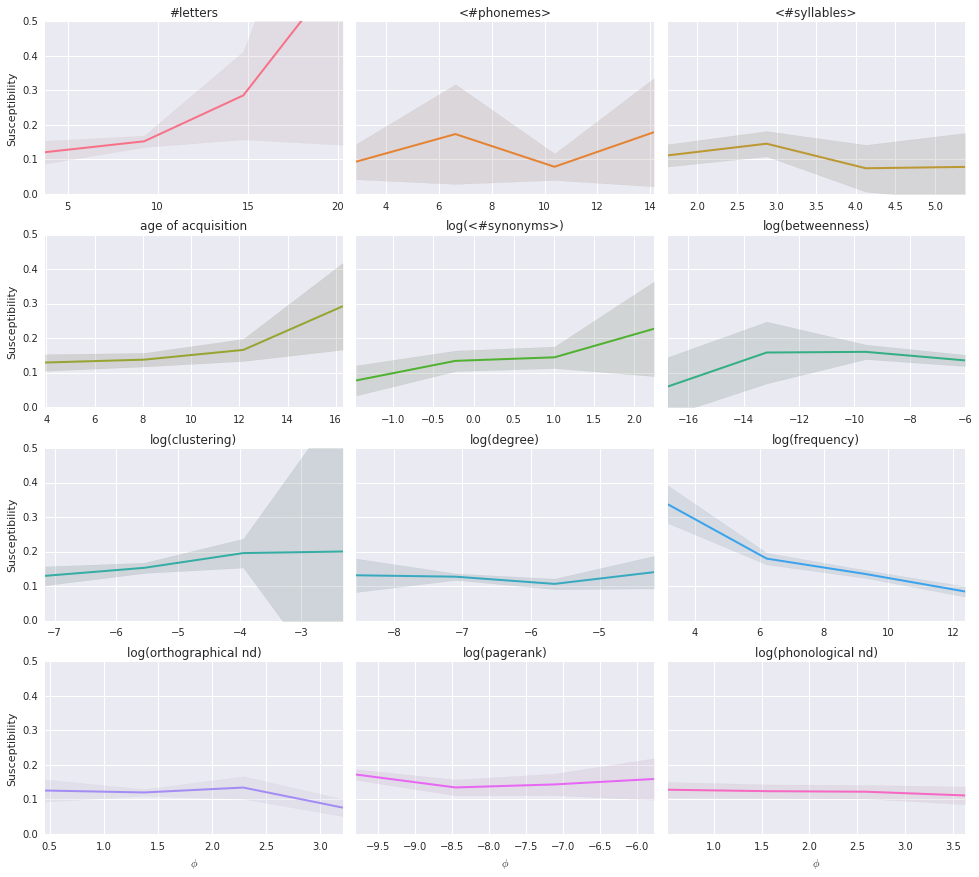

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

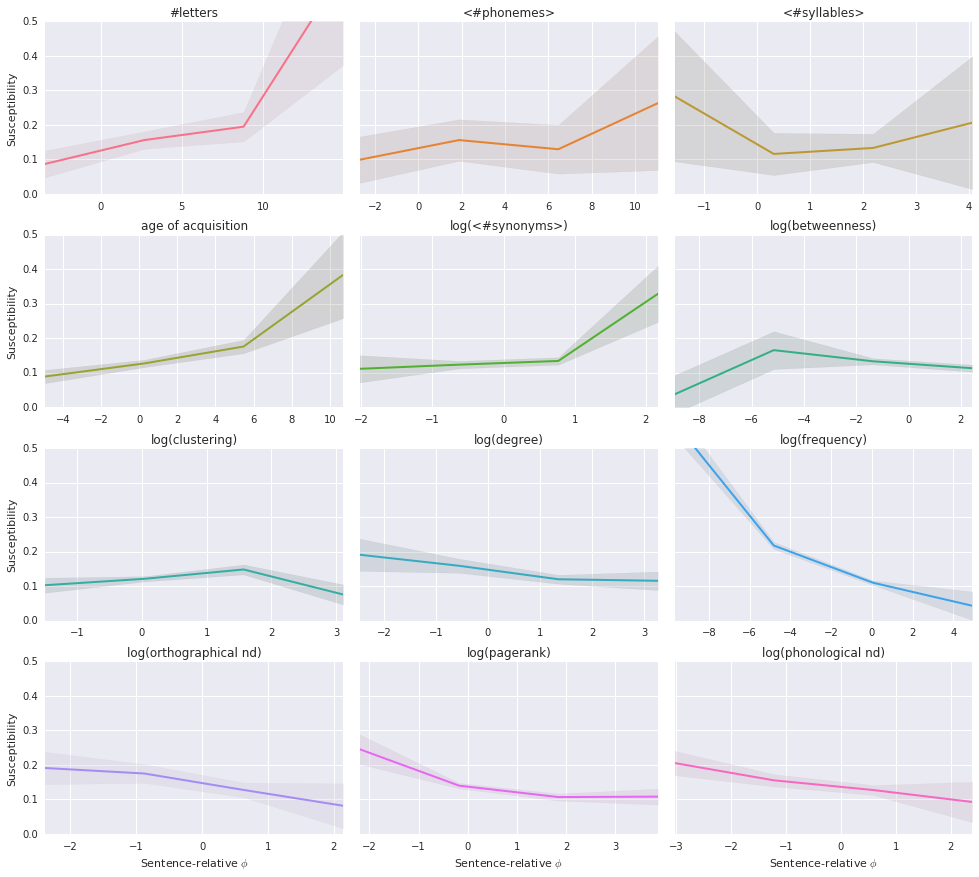

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

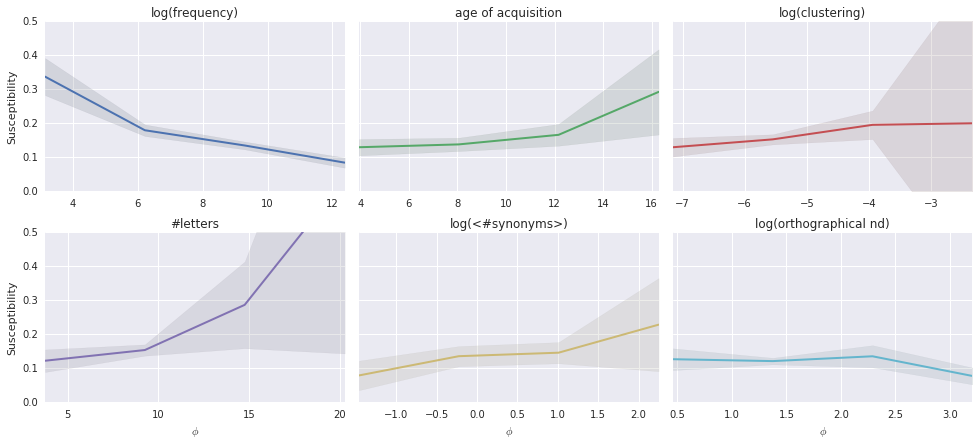

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

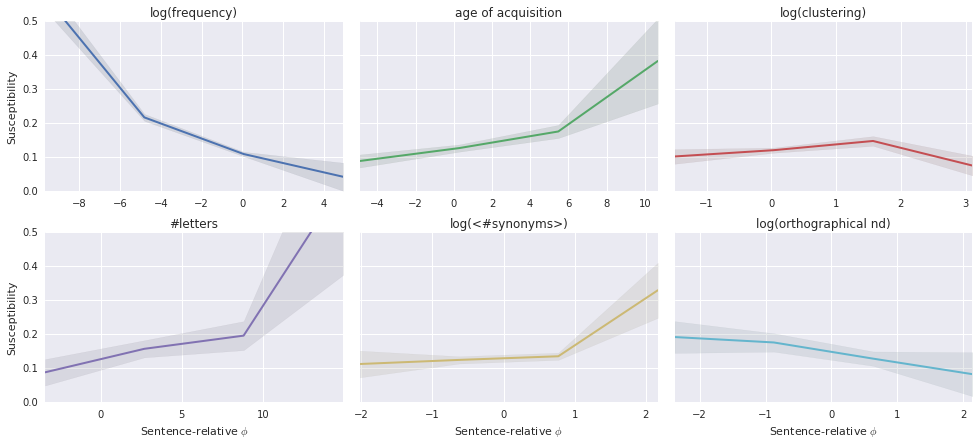

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'word']]
poses['rPOS'] = poses['POS'].apply(lambda x: x[0])

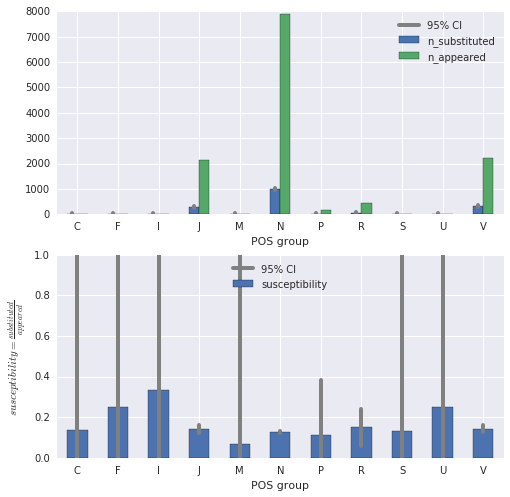

In [12]:
# Compute POS counts.
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='sison_glaz')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 1), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

## 4 Susceptibility in terms of absolute fractiles

In [13]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

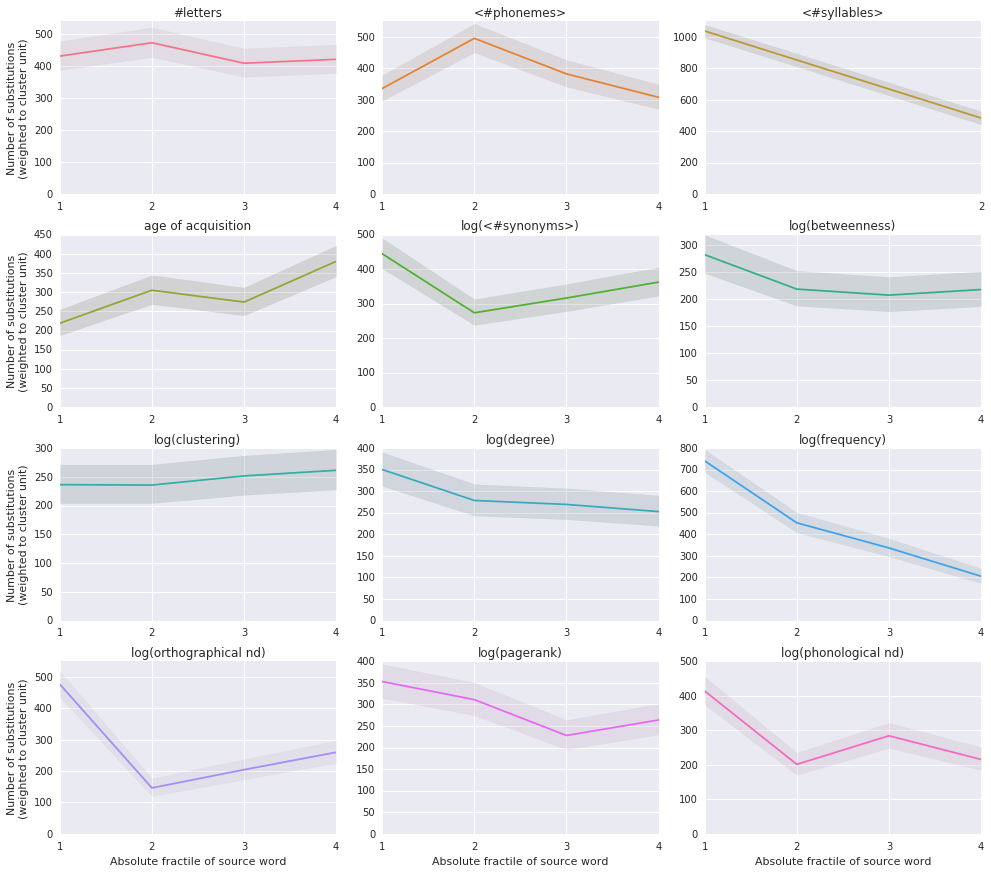

In [14]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

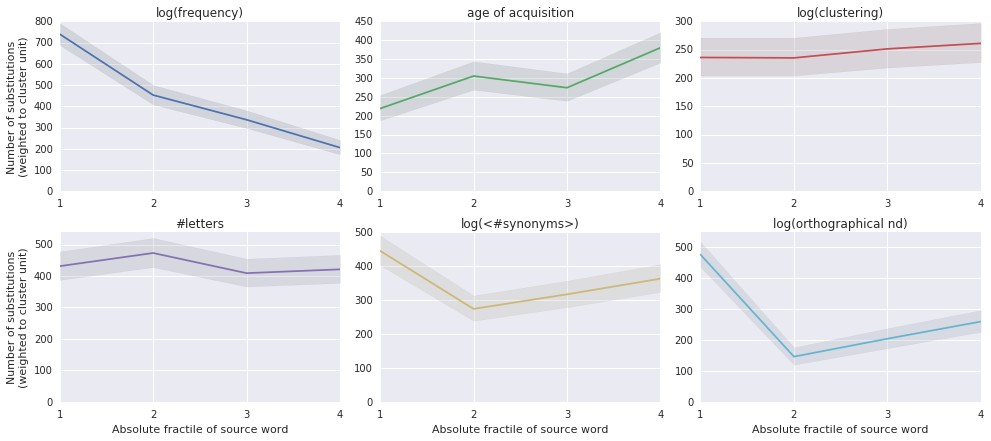

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [16]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   85 of 63446) |                    | Elapsed Time: 0:00:01 ETA:  0:12:26

  0% (  177 of 63446) |                    | Elapsed Time: 0:00:02 ETA:  0:11:27

  0% (  263 of 63446) |                    | Elapsed Time: 0:00:03 ETA:  0:11:50

  0% (  344 of 63446) |                    | Elapsed Time: 0:00:04 ETA:  0:12:13

  0% (  432 of 63446) |                    | Elapsed Time: 0:00:05 ETA:  0:12:10

  0% (  514 of 63446) |                    | Elapsed Time: 0:00:06 ETA:  0:12:17

  0% (  602 of 63446) |                    | Elapsed Time: 0:00:07 ETA:  0:12:12

  1% (  691 of 63446) |                    | Elapsed Time: 0:00:08 ETA:  0:12:08

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:09 ETA:  0:12:06

  1% (  880 of 63446) |                    | Elapsed Time: 0:00:10 ETA:  0:12:12

  1% (  970 of 63446) |                    | Elapsed Time: 0:00:11 ETA:  0:12:07

  1% ( 1060 of 63446) |                    | Elapsed Time: 0:00:12 ETA:  0:11:57

  1% ( 1150 of 63446) |                    | Elapsed Time: 0:00:13 ETA:  0:11:53

  1% ( 1243 of 63446) |                    | Elapsed Time: 0:00:14 ETA:  0:11:41

  2% ( 1333 of 63446) |                    | Elapsed Time: 0:00:15 ETA:  0:11:39

  2% ( 1424 of 63446) |                    | Elapsed Time: 0:00:16 ETA:  0:11:36

  2% ( 1530 of 63446) |                    | Elapsed Time: 0:00:17 ETA:  0:11:16

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:17 ETA:  0:11:10

  2% ( 1695 of 63446) |                    | Elapsed Time: 0:00:18 ETA:  0:10:50

  2% ( 1792 of 63446) |                    | Elapsed Time: 0:00:19 ETA:  0:10:44

  3% ( 1907 of 63446) |                    | Elapsed Time: 0:00:20 ETA:  0:10:23

  3% ( 1989 of 63446) |                    | Elapsed Time: 0:00:21 ETA:  0:10:29

  3% ( 2067 of 63446) |                    | Elapsed Time: 0:00:22 ETA:  0:10:39

  3% ( 2143 of 63446) |                    | Elapsed Time: 0:00:23 ETA:  0:10:50

  3% ( 2220 of 63446) |                    | Elapsed Time: 0:00:24 ETA:  0:11:01

  3% ( 2300 of 63446) |                    | Elapsed Time: 0:00:25 ETA:  0:11:23

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:00:26 ETA:  0:11:59

  3% ( 2464 of 63446) |                    | Elapsed Time: 0:00:27 ETA:  0:12:13

  4% ( 2551 of 63446) |                    | Elapsed Time: 0:00:28 ETA:  0:12:44

  4% ( 2637 of 63446) |                    | Elapsed Time: 0:00:29 ETA:  0:12:37

  4% ( 2724 of 63446) |                    | Elapsed Time: 0:00:30 ETA:  0:12:26

  4% ( 2813 of 63446) |                    | Elapsed Time: 0:00:31 ETA:  0:12:10

  4% ( 2903 of 63446) |                    | Elapsed Time: 0:00:32 ETA:  0:11:54

  4% ( 2991 of 63446) |                    | Elapsed Time: 0:00:33 ETA:  0:11:44

  4% ( 3081 of 63446) |                    | Elapsed Time: 0:00:34 ETA:  0:11:32

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:00:35 ETA:  0:11:24

  5% ( 3264 of 63446) |#                   | Elapsed Time: 0:00:36 ETA:  0:11:20

  5% ( 3347 of 63446) |#                   | Elapsed Time: 0:00:37 ETA:  0:11:22

  5% ( 3422 of 63446) |#                   | Elapsed Time: 0:00:38 ETA:  0:11:34

  5% ( 3496 of 63446) |#                   | Elapsed Time: 0:00:39 ETA:  0:11:48

  5% ( 3589 of 63446) |#                   | Elapsed Time: 0:00:40 ETA:  0:11:44

  5% ( 3750 of 63446) |#                   | Elapsed Time: 0:00:41 ETA:  0:10:32

  6% ( 3907 of 63446) |#                   | Elapsed Time: 0:00:42 ETA:  0:09:36

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:00:43 ETA:  0:09:10

  6% ( 4126 of 63446) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:36

  6% ( 4285 of 63446) |#                   | Elapsed Time: 0:00:45 ETA:  0:07:57

  7% ( 4442 of 63446) |#                   | Elapsed Time: 0:00:46 ETA:  0:07:21

  7% ( 4601 of 63446) |#                   | Elapsed Time: 0:00:47 ETA:  0:06:45

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:00:48 ETA:  0:05:55

  7% ( 4879 of 63446) |#                   | Elapsed Time: 0:00:49 ETA:  0:06:08

  7% ( 4962 of 63446) |#                   | Elapsed Time: 0:00:50 ETA:  0:06:37

  7% ( 5044 of 63446) |#                   | Elapsed Time: 0:00:51 ETA:  0:07:03

  8% ( 5126 of 63446) |#                   | Elapsed Time: 0:00:52 ETA:  0:07:39

  8% ( 5213 of 63446) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:18

  8% ( 5300 of 63446) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:02

  8% ( 5385 of 63446) |#                   | Elapsed Time: 0:00:55 ETA:  0:09:58

  8% ( 5476 of 63446) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:54

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:00:57 ETA:  0:10:54

  8% ( 5635 of 63446) |#                   | Elapsed Time: 0:00:58 ETA:  0:11:28

  9% ( 5717 of 63446) |#                   | Elapsed Time: 0:00:59 ETA:  0:11:28

  9% ( 5807 of 63446) |#                   | Elapsed Time: 0:01:00 ETA:  0:11:19

  9% ( 5897 of 63446) |#                   | Elapsed Time: 0:01:01 ETA:  0:11:11

  9% ( 5992 of 63446) |#                   | Elapsed Time: 0:01:02 ETA:  0:11:03

  9% ( 6086 of 63446) |#                   | Elapsed Time: 0:01:03 ETA:  0:10:55

  9% ( 6174 of 63446) |#                   | Elapsed Time: 0:01:04 ETA:  0:10:52

  9% ( 6266 of 63446) |#                   | Elapsed Time: 0:01:05 ETA:  0:10:50

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:06 ETA:  0:10:45

 10% ( 6431 of 63446) |##                  | Elapsed Time: 0:01:07 ETA:  0:10:42

 10% ( 6520 of 63446) |##                  | Elapsed Time: 0:01:08 ETA:  0:10:35

 10% ( 6608 of 63446) |##                  | Elapsed Time: 0:01:09 ETA:  0:10:35

 10% ( 6715 of 63446) |##                  | Elapsed Time: 0:01:10 ETA:  0:10:19

 10% ( 6798 of 63446) |##                  | Elapsed Time: 0:01:11 ETA:  0:10:28

 10% ( 6877 of 63446) |##                  | Elapsed Time: 0:01:12 ETA:  0:10:40

 10% ( 6956 of 63446) |##                  | Elapsed Time: 0:01:13 ETA:  0:10:47

 11% ( 7035 of 63446) |##                  | Elapsed Time: 0:01:14 ETA:  0:10:58

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:15 ETA:  0:11:01

 11% ( 7250 of 63446) |##                  | Elapsed Time: 0:01:16 ETA:  0:10:36

 11% ( 7337 of 63446) |##                  | Elapsed Time: 0:01:17 ETA:  0:10:37

 11% ( 7425 of 63446) |##                  | Elapsed Time: 0:01:18 ETA:  0:10:55

 11% ( 7523 of 63446) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:39

 12% ( 7662 of 63446) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:43

 12% ( 7809 of 63446) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:49

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:10

 12% ( 8036 of 63446) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:11

 12% ( 8123 of 63446) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:26

 12% ( 8218 of 63446) |##                  | Elapsed Time: 0:01:25 ETA:  0:08:19

 13% ( 8313 of 63446) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:14

 13% ( 8403 of 63446) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:18

 13% ( 8503 of 63446) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:45

 13% ( 8595 of 63446) |##                  | Elapsed Time: 0:01:29 ETA:  0:09:27

 13% ( 8683 of 63446) |##                  | Elapsed Time: 0:01:30 ETA:  0:09:45

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:01:30 ETA:  0:09:41

 13% ( 8822 of 63446) |##                  | Elapsed Time: 0:01:31 ETA:  0:09:46

 14% ( 8917 of 63446) |##                  | Elapsed Time: 0:01:32 ETA:  0:09:39

 14% ( 9010 of 63446) |##                  | Elapsed Time: 0:01:33 ETA:  0:09:40

 14% ( 9104 of 63446) |##                  | Elapsed Time: 0:01:34 ETA:  0:09:39

 14% ( 9199 of 63446) |##                  | Elapsed Time: 0:01:36 ETA:  0:09:34

 14% ( 9294 of 63446) |##                  | Elapsed Time: 0:01:37 ETA:  0:09:37

 14% ( 9387 of 63446) |##                  | Elapsed Time: 0:01:38 ETA:  0:09:35

 14% ( 9486 of 63446) |##                  | Elapsed Time: 0:01:39 ETA:  0:09:25

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:01:39 ETA:  0:09:30

 15% ( 9611 of 63446) |###                 | Elapsed Time: 0:01:40 ETA:  0:09:32

 15% ( 9706 of 63446) |###                 | Elapsed Time: 0:01:41 ETA:  0:09:31

 15% ( 9799 of 63446) |###                 | Elapsed Time: 0:01:42 ETA:  0:09:30

 15% ( 9892 of 63446) |###                 | Elapsed Time: 0:01:43 ETA:  0:09:31

 15% ( 9986 of 63446) |###                 | Elapsed Time: 0:01:44 ETA:  0:09:30

 15% (10080 of 63446) |###                 | Elapsed Time: 0:01:45 ETA:  0:09:30

 16% (10175 of 63446) |###                 | Elapsed Time: 0:01:46 ETA:  0:09:28

 16% (10275 of 63446) |###                 | Elapsed Time: 0:01:47 ETA:  0:09:25

 16% (10310 of 63446) |###                 | Elapsed Time: 0:01:47 ETA:  0:09:21

 16% (10415 of 63446) |###                 | Elapsed Time: 0:01:48 ETA:  0:09:11

 16% (10521 of 63446) |###                 | Elapsed Time: 0:01:49 ETA:  0:09:01

 16% (10622 of 63446) |###                 | Elapsed Time: 0:01:50 ETA:  0:08:54

 16% (10724 of 63446) |###                 | Elapsed Time: 0:01:51 ETA:  0:08:45

 17% (10822 of 63446) |###                 | Elapsed Time: 0:01:52 ETA:  0:08:41

 17% (10923 of 63446) |###                 | Elapsed Time: 0:01:53 ETA:  0:08:35

 17% (11023 of 63446) |###                 | Elapsed Time: 0:01:54 ETA:  0:08:30

 17% (11104 of 63446) |###                 | Elapsed Time: 0:01:55 ETA:  0:08:28

 17% (11205 of 63446) |###                 | Elapsed Time: 0:01:56 ETA:  0:08:29

 17% (11302 of 63446) |###                 | Elapsed Time: 0:01:57 ETA:  0:08:33

 17% (11399 of 63446) |###                 | Elapsed Time: 0:01:58 ETA:  0:08:39

 18% (11498 of 63446) |###                 | Elapsed Time: 0:01:59 ETA:  0:08:40

 18% (11597 of 63446) |###                 | Elapsed Time: 0:02:00 ETA:  0:08:41

 18% (11698 of 63446) |###                 | Elapsed Time: 0:02:01 ETA:  0:08:39

 18% (11797 of 63446) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:39

 18% (11897 of 63446) |###                 | Elapsed Time: 0:02:03 ETA:  0:08:42

 18% (11994 of 63446) |###                 | Elapsed Time: 0:02:04 ETA:  0:08:45

 19% (12093 of 63446) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:42

 19% (12193 of 63446) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:38

 19% (12294 of 63446) |###                 | Elapsed Time: 0:02:07 ETA:  0:08:35

 19% (12393 of 63446) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:34

 19% (12493 of 63446) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:33

 19% (12593 of 63446) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:32

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:11 ETA:  0:08:28

 20% (12790 of 63446) |####                | Elapsed Time: 0:02:12 ETA:  0:08:27

 20% (12890 of 63446) |####                | Elapsed Time: 0:02:13 ETA:  0:08:23

 20% (12989 of 63446) |####                | Elapsed Time: 0:02:14 ETA:  0:08:22

 20% (13089 of 63446) |####                | Elapsed Time: 0:02:15 ETA:  0:08:21

 20% (13190 of 63446) |####                | Elapsed Time: 0:02:16 ETA:  0:08:21

 20% (13290 of 63446) |####                | Elapsed Time: 0:02:17 ETA:  0:08:19

 21% (13391 of 63446) |####                | Elapsed Time: 0:02:18 ETA:  0:08:17

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:19 ETA:  0:08:16

 21% (13582 of 63446) |####                | Elapsed Time: 0:02:20 ETA:  0:08:16

 21% (13684 of 63446) |####                | Elapsed Time: 0:02:21 ETA:  0:08:14

 21% (13784 of 63446) |####                | Elapsed Time: 0:02:22 ETA:  0:08:13

 21% (13886 of 63446) |####                | Elapsed Time: 0:02:23 ETA:  0:08:10

 22% (13982 of 63446) |####                | Elapsed Time: 0:02:24 ETA:  0:08:11

 22% (14092 of 63446) |####                | Elapsed Time: 0:02:25 ETA:  0:08:04

 22% (14176 of 63446) |####                | Elapsed Time: 0:02:26 ETA:  0:08:14

 22% (14259 of 63446) |####                | Elapsed Time: 0:02:27 ETA:  0:08:26

 22% (14276 of 63446) |####                | Elapsed Time: 0:02:27 ETA:  0:08:31

 22% (14360 of 63446) |####                | Elapsed Time: 0:02:28 ETA:  0:08:43

 22% (14441 of 63446) |####                | Elapsed Time: 0:02:29 ETA:  0:09:01

 22% (14521 of 63446) |####                | Elapsed Time: 0:02:30 ETA:  0:09:19

 23% (14616 of 63446) |####                | Elapsed Time: 0:02:31 ETA:  0:09:25

 23% (14711 of 63446) |####                | Elapsed Time: 0:02:32 ETA:  0:09:25

 23% (14806 of 63446) |####                | Elapsed Time: 0:02:33 ETA:  0:09:38

 23% (14885 of 63446) |####                | Elapsed Time: 0:02:37 ETA:  0:13:13

 23% (14964 of 63446) |####                | Elapsed Time: 0:02:38 ETA:  0:13:17

 23% (15040 of 63446) |####                | Elapsed Time: 0:02:39 ETA:  0:13:09

 23% (15069 of 63446) |####                | Elapsed Time: 0:02:39 ETA:  0:13:26

 23% (15146 of 63446) |####                | Elapsed Time: 0:02:40 ETA:  0:13:31

 23% (15223 of 63446) |####                | Elapsed Time: 0:02:41 ETA:  0:13:34

 24% (15318 of 63446) |####                | Elapsed Time: 0:02:42 ETA:  0:13:33

 24% (15428 of 63446) |####                | Elapsed Time: 0:02:43 ETA:  0:13:12

 24% (15533 of 63446) |####                | Elapsed Time: 0:02:44 ETA:  0:12:59

 24% (15638 of 63446) |####                | Elapsed Time: 0:02:45 ETA:  0:09:05

 24% (15746 of 63446) |####                | Elapsed Time: 0:02:46 ETA:  0:08:38

 25% (15862 of 63446) |#####               | Elapsed Time: 0:02:47 ETA:  0:08:05

 25% (15967 of 63446) |#####               | Elapsed Time: 0:02:48 ETA:  0:07:42

 25% (16070 of 63446) |#####               | Elapsed Time: 0:02:49 ETA:  0:07:21

 25% (16171 of 63446) |#####               | Elapsed Time: 0:02:50 ETA:  0:07:15

 25% (16276 of 63446) |#####               | Elapsed Time: 0:02:51 ETA:  0:07:18

 25% (16376 of 63446) |#####               | Elapsed Time: 0:02:52 ETA:  0:07:21

 25% (16455 of 63446) |#####               | Elapsed Time: 0:02:53 ETA:  0:07:40

 26% (16534 of 63446) |#####               | Elapsed Time: 0:02:54 ETA:  0:08:02

 26% (16613 of 63446) |#####               | Elapsed Time: 0:02:55 ETA:  0:08:24

 26% (16655 of 63446) |#####               | Elapsed Time: 0:02:56 ETA:  0:08:31

 26% (16763 of 63446) |#####               | Elapsed Time: 0:02:57 ETA:  0:08:27

 26% (16907 of 63446) |#####               | Elapsed Time: 0:02:58 ETA:  0:07:52

 26% (17018 of 63446) |#####               | Elapsed Time: 0:02:59 ETA:  0:07:44

 26% (17112 of 63446) |#####               | Elapsed Time: 0:03:00 ETA:  0:07:52

 27% (17198 of 63446) |#####               | Elapsed Time: 0:03:01 ETA:  0:08:01

 27% (17283 of 63446) |#####               | Elapsed Time: 0:03:02 ETA:  0:07:55

 27% (17373 of 63446) |#####               | Elapsed Time: 0:03:03 ETA:  0:07:45

 27% (17448 of 63446) |#####               | Elapsed Time: 0:03:04 ETA:  0:07:25

 27% (17565 of 63446) |#####               | Elapsed Time: 0:03:05 ETA:  0:07:05

 27% (17661 of 63446) |#####               | Elapsed Time: 0:03:06 ETA:  0:07:12

 27% (17751 of 63446) |#####               | Elapsed Time: 0:03:07 ETA:  0:07:51

 28% (17840 of 63446) |#####               | Elapsed Time: 0:03:08 ETA:  0:08:08

 28% (17931 of 63446) |#####               | Elapsed Time: 0:03:09 ETA:  0:08:09

 28% (18032 of 63446) |#####               | Elapsed Time: 0:03:10 ETA:  0:07:55

 28% (18163 of 63446) |#####               | Elapsed Time: 0:03:11 ETA:  0:07:19

 28% (18241 of 63446) |#####               | Elapsed Time: 0:03:11 ETA:  0:06:59

 28% (18372 of 63446) |#####               | Elapsed Time: 0:03:12 ETA:  0:06:40

 29% (18504 of 63446) |#####               | Elapsed Time: 0:03:13 ETA:  0:06:30

 29% (18635 of 63446) |#####               | Elapsed Time: 0:03:14 ETA:  0:06:08

 29% (18766 of 63446) |#####               | Elapsed Time: 0:03:15 ETA:  0:05:44

 29% (18899 of 63446) |#####               | Elapsed Time: 0:03:16 ETA:  0:05:21

 30% (19034 of 63446) |######              | Elapsed Time: 0:03:17 ETA:  0:04:47

 30% (19166 of 63446) |######              | Elapsed Time: 0:03:18 ETA:  0:04:45

 30% (19300 of 63446) |######              | Elapsed Time: 0:03:19 ETA:  0:04:42

 30% (19427 of 63446) |######              | Elapsed Time: 0:03:20 ETA:  0:04:42

 30% (19527 of 63446) |######              | Elapsed Time: 0:03:21 ETA:  0:04:56

 31% (19671 of 63446) |######              | Elapsed Time: 0:03:22 ETA:  0:04:49

 31% (19735 of 63446) |######              | Elapsed Time: 0:03:23 ETA:  0:05:23

 31% (19827 of 63446) |######              | Elapsed Time: 0:03:24 ETA:  0:06:04

 31% (19912 of 63446) |######              | Elapsed Time: 0:03:25 ETA:  0:06:21

 31% (20000 of 63446) |######              | Elapsed Time: 0:03:26 ETA:  0:06:51

 31% (20100 of 63446) |######              | Elapsed Time: 0:03:27 ETA:  0:07:16

 31% (20199 of 63446) |######              | Elapsed Time: 0:03:28 ETA:  0:07:39

 31% (20301 of 63446) |######              | Elapsed Time: 0:03:29 ETA:  0:07:37

 32% (20398 of 63446) |######              | Elapsed Time: 0:03:30 ETA:  0:08:19

 32% (20491 of 63446) |######              | Elapsed Time: 0:03:31 ETA:  0:07:51

 32% (20620 of 63446) |######              | Elapsed Time: 0:03:33 ETA:  0:07:24

 32% (20733 of 63446) |######              | Elapsed Time: 0:03:34 ETA:  0:07:00

 32% (20843 of 63446) |######              | Elapsed Time: 0:03:35 ETA:  0:06:43

 33% (20949 of 63446) |######              | Elapsed Time: 0:03:36 ETA:  0:06:37

 33% (21068 of 63446) |######              | Elapsed Time: 0:03:37 ETA:  0:06:22

 33% (21179 of 63446) |######              | Elapsed Time: 0:03:38 ETA:  0:06:14

 33% (21294 of 63446) |######              | Elapsed Time: 0:03:39 ETA:  0:06:01

 33% (21389 of 63446) |######              | Elapsed Time: 0:03:40 ETA:  0:05:59

 33% (21414 of 63446) |######              | Elapsed Time: 0:03:40 ETA:  0:05:59

 33% (21499 of 63446) |######              | Elapsed Time: 0:03:41 ETA:  0:06:15

 34% (21583 of 63446) |######              | Elapsed Time: 0:03:42 ETA:  0:06:34

 34% (21685 of 63446) |######              | Elapsed Time: 0:03:43 ETA:  0:06:39

 34% (21772 of 63446) |######              | Elapsed Time: 0:03:44 ETA:  0:06:53

 34% (21855 of 63446) |######              | Elapsed Time: 0:03:45 ETA:  0:07:21

 34% (21938 of 63446) |######              | Elapsed Time: 0:03:46 ETA:  0:07:45

 34% (22032 of 63446) |######              | Elapsed Time: 0:03:47 ETA:  0:08:05

 34% (22149 of 63446) |######              | Elapsed Time: 0:03:48 ETA:  0:07:43

 35% (22207 of 63446) |#######             | Elapsed Time: 0:03:48 ETA:  0:07:29

 35% (22339 of 63446) |#######             | Elapsed Time: 0:03:49 ETA:  0:06:49

 35% (22479 of 63446) |#######             | Elapsed Time: 0:03:50 ETA:  0:06:08

 35% (22624 of 63446) |#######             | Elapsed Time: 0:03:51 ETA:  0:05:40

 35% (22717 of 63446) |#######             | Elapsed Time: 0:03:52 ETA:  0:05:35

 35% (22806 of 63446) |#######             | Elapsed Time: 0:03:53 ETA:  0:05:30

 36% (22893 of 63446) |#######             | Elapsed Time: 0:03:54 ETA:  0:05:27

 36% (23000 of 63446) |#######             | Elapsed Time: 0:03:55 ETA:  0:05:24

 36% (23115 of 63446) |#######             | Elapsed Time: 0:03:57 ETA:  0:05:29

 36% (23214 of 63446) |#######             | Elapsed Time: 0:03:58 ETA:  0:05:49

 36% (23296 of 63446) |#######             | Elapsed Time: 0:03:59 ETA:  0:06:30

 36% (23380 of 63446) |#######             | Elapsed Time: 0:04:00 ETA:  0:07:20

 36% (23461 of 63446) |#######             | Elapsed Time: 0:04:01 ETA:  0:07:31

 37% (23534 of 63446) |#######             | Elapsed Time: 0:04:02 ETA:  0:07:46

 37% (23606 of 63446) |#######             | Elapsed Time: 0:04:03 ETA:  0:08:00

 37% (23699 of 63446) |#######             | Elapsed Time: 0:04:04 ETA:  0:08:06

 37% (23793 of 63446) |#######             | Elapsed Time: 0:04:04 ETA:  0:07:53

 37% (23880 of 63446) |#######             | Elapsed Time: 0:04:05 ETA:  0:08:18

 37% (23983 of 63446) |#######             | Elapsed Time: 0:04:06 ETA:  0:08:13

 37% (24071 of 63446) |#######             | Elapsed Time: 0:04:07 ETA:  0:08:06

 38% (24161 of 63446) |#######             | Elapsed Time: 0:04:09 ETA:  0:08:00

 38% (24251 of 63446) |#######             | Elapsed Time: 0:04:10 ETA:  0:07:49

 38% (24336 of 63446) |#######             | Elapsed Time: 0:04:11 ETA:  0:07:37

 38% (24450 of 63446) |#######             | Elapsed Time: 0:04:12 ETA:  0:07:00

 38% (24544 of 63446) |#######             | Elapsed Time: 0:04:13 ETA:  0:06:58

 38% (24586 of 63446) |#######             | Elapsed Time: 0:04:13 ETA:  0:07:05

 38% (24683 of 63446) |#######             | Elapsed Time: 0:04:14 ETA:  0:06:56

 39% (24781 of 63446) |#######             | Elapsed Time: 0:04:15 ETA:  0:06:59

 39% (24878 of 63446) |#######             | Elapsed Time: 0:04:16 ETA:  0:06:51

 39% (24966 of 63446) |#######             | Elapsed Time: 0:04:17 ETA:  0:06:51

 39% (25055 of 63446) |#######             | Elapsed Time: 0:04:18 ETA:  0:06:51

 39% (25155 of 63446) |#######             | Elapsed Time: 0:04:19 ETA:  0:06:38

 39% (25263 of 63446) |#######             | Elapsed Time: 0:04:20 ETA:  0:06:42

 40% (25379 of 63446) |########            | Elapsed Time: 0:04:21 ETA:  0:06:23

 40% (25457 of 63446) |########            | Elapsed Time: 0:04:22 ETA:  0:06:37

 40% (25536 of 63446) |########            | Elapsed Time: 0:04:23 ETA:  0:06:53

 40% (25618 of 63446) |########            | Elapsed Time: 0:04:24 ETA:  0:07:06

 40% (25702 of 63446) |########            | Elapsed Time: 0:04:25 ETA:  0:07:09

 40% (25812 of 63446) |########            | Elapsed Time: 0:04:26 ETA:  0:06:48

 40% (25921 of 63446) |########            | Elapsed Time: 0:04:27 ETA:  0:06:40

 41% (26014 of 63446) |########            | Elapsed Time: 0:04:28 ETA:  0:06:52

 41% (26107 of 63446) |########            | Elapsed Time: 0:04:29 ETA:  0:07:12

 41% (26172 of 63446) |########            | Elapsed Time: 0:04:30 ETA:  0:07:19

 41% (26258 of 63446) |########            | Elapsed Time: 0:04:31 ETA:  0:07:11

 41% (26348 of 63446) |########            | Elapsed Time: 0:04:32 ETA:  0:07:00

 41% (26430 of 63446) |########            | Elapsed Time: 0:04:33 ETA:  0:06:59

 41% (26512 of 63446) |########            | Elapsed Time: 0:04:34 ETA:  0:06:59

 41% (26594 of 63446) |########            | Elapsed Time: 0:04:35 ETA:  0:07:24

 42% (26670 of 63446) |########            | Elapsed Time: 0:04:36 ETA:  0:07:54

 42% (26746 of 63446) |########            | Elapsed Time: 0:04:37 ETA:  0:08:11

 42% (26823 of 63446) |########            | Elapsed Time: 0:04:38 ETA:  0:08:28

 42% (26899 of 63446) |########            | Elapsed Time: 0:04:39 ETA:  0:08:31

 42% (26965 of 63446) |########            | Elapsed Time: 0:04:40 ETA:  0:08:40

 42% (27041 of 63446) |########            | Elapsed Time: 0:04:41 ETA:  0:08:54

 42% (27122 of 63446) |########            | Elapsed Time: 0:04:42 ETA:  0:08:55

 42% (27217 of 63446) |########            | Elapsed Time: 0:04:43 ETA:  0:08:40

 43% (27301 of 63446) |########            | Elapsed Time: 0:04:44 ETA:  0:08:37

 43% (27410 of 63446) |########            | Elapsed Time: 0:04:45 ETA:  0:08:00

 43% (27531 of 63446) |########            | Elapsed Time: 0:04:46 ETA:  0:07:15

 43% (27637 of 63446) |########            | Elapsed Time: 0:04:47 ETA:  0:06:47

 43% (27758 of 63446) |########            | Elapsed Time: 0:04:48 ETA:  0:06:09

 43% (27861 of 63446) |########            | Elapsed Time: 0:04:49 ETA:  0:05:51

 44% (27962 of 63446) |########            | Elapsed Time: 0:04:50 ETA:  0:05:32

 44% (28063 of 63446) |########            | Elapsed Time: 0:04:51 ETA:  0:05:18

 44% (28159 of 63446) |########            | Elapsed Time: 0:04:52 ETA:  0:05:15

 44% (28254 of 63446) |########            | Elapsed Time: 0:04:53 ETA:  0:05:07

 44% (28343 of 63446) |########            | Elapsed Time: 0:04:54 ETA:  0:05:19

 44% (28433 of 63446) |########            | Elapsed Time: 0:04:55 ETA:  0:05:39

 44% (28521 of 63446) |########            | Elapsed Time: 0:04:56 ETA:  0:05:51

 45% (28551 of 63446) |#########           | Elapsed Time: 0:04:56 ETA:  0:06:13

 45% (28638 of 63446) |#########           | Elapsed Time: 0:04:57 ETA:  0:06:26

 45% (28831 of 63446) |#########           | Elapsed Time: 0:04:58 ETA:  0:05:13

 45% (28999 of 63446) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:28

 45% (29103 of 63446) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:23

 46% (29188 of 63446) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:27

 46% (29268 of 63446) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:32

 46% (29344 of 63446) |#########           | Elapsed Time: 0:05:03 ETA:  0:04:38

 46% (29424 of 63446) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:42

 46% (29523 of 63446) |#########           | Elapsed Time: 0:05:05 ETA:  0:04:42

 46% (29620 of 63446) |#########           | Elapsed Time: 0:05:06 ETA:  0:04:36

 46% (29709 of 63446) |#########           | Elapsed Time: 0:05:07 ETA:  0:05:44

 46% (29780 of 63446) |#########           | Elapsed Time: 0:05:08 ETA:  0:07:04

 47% (29889 of 63446) |#########           | Elapsed Time: 0:05:09 ETA:  0:06:59

 47% (30016 of 63446) |#########           | Elapsed Time: 0:05:10 ETA:  0:06:20

 47% (30137 of 63446) |#########           | Elapsed Time: 0:05:11 ETA:  0:05:43

 47% (30240 of 63446) |#########           | Elapsed Time: 0:05:12 ETA:  0:05:25

 47% (30328 of 63446) |#########           | Elapsed Time: 0:05:13 ETA:  0:05:18

 47% (30441 of 63446) |#########           | Elapsed Time: 0:05:14 ETA:  0:05:08

 48% (30531 of 63446) |#########           | Elapsed Time: 0:05:15 ETA:  0:05:11

 48% (30620 of 63446) |#########           | Elapsed Time: 0:05:16 ETA:  0:05:10

 48% (30711 of 63446) |#########           | Elapsed Time: 0:05:17 ETA:  0:04:55

 48% (30798 of 63446) |#########           | Elapsed Time: 0:05:18 ETA:  0:05:09

 48% (30885 of 63446) |#########           | Elapsed Time: 0:05:19 ETA:  0:05:37

 48% (30930 of 63446) |#########           | Elapsed Time: 0:05:20 ETA:  0:06:06

 48% (31026 of 63446) |#########           | Elapsed Time: 0:05:21 ETA:  0:06:11

 49% (31132 of 63446) |#########           | Elapsed Time: 0:05:22 ETA:  0:05:54

 49% (31237 of 63446) |#########           | Elapsed Time: 0:05:23 ETA:  0:05:59

 49% (31330 of 63446) |#########           | Elapsed Time: 0:05:24 ETA:  0:05:56

 49% (31441 of 63446) |#########           | Elapsed Time: 0:05:25 ETA:  0:05:36

 49% (31525 of 63446) |#########           | Elapsed Time: 0:05:26 ETA:  0:05:41

 49% (31627 of 63446) |#########           | Elapsed Time: 0:05:27 ETA:  0:05:28

 49% (31701 of 63446) |#########           | Elapsed Time: 0:05:28 ETA:  0:05:38

 50% (31724 of 63446) |##########          | Elapsed Time: 0:05:28 ETA:  0:05:40

 50% (31795 of 63446) |##########          | Elapsed Time: 0:05:29 ETA:  0:06:01

 50% (31897 of 63446) |##########          | Elapsed Time: 0:05:30 ETA:  0:06:03

 50% (31994 of 63446) |##########          | Elapsed Time: 0:05:31 ETA:  0:06:09

 50% (32075 of 63446) |##########          | Elapsed Time: 0:05:32 ETA:  0:06:19

 50% (32157 of 63446) |##########          | Elapsed Time: 0:05:33 ETA:  0:06:48

 50% (32245 of 63446) |##########          | Elapsed Time: 0:05:34 ETA:  0:06:43

 50% (32332 of 63446) |##########          | Elapsed Time: 0:05:35 ETA:  0:06:58

 51% (32417 of 63446) |##########          | Elapsed Time: 0:05:36 ETA:  0:06:45

 51% (32517 of 63446) |##########          | Elapsed Time: 0:05:37 ETA:  0:06:25

 51% (32602 of 63446) |##########          | Elapsed Time: 0:05:38 ETA:  0:06:42

 51% (32695 of 63446) |##########          | Elapsed Time: 0:05:39 ETA:  0:06:45

 51% (32786 of 63446) |##########          | Elapsed Time: 0:05:40 ETA:  0:06:33

 51% (32877 of 63446) |##########          | Elapsed Time: 0:05:41 ETA:  0:06:23

 51% (32970 of 63446) |##########          | Elapsed Time: 0:05:42 ETA:  0:06:16

 52% (33063 of 63446) |##########          | Elapsed Time: 0:05:43 ETA:  0:06:09

 52% (33156 of 63446) |##########          | Elapsed Time: 0:05:44 ETA:  0:06:00

 52% (33253 of 63446) |##########          | Elapsed Time: 0:05:45 ETA:  0:05:47

 52% (33310 of 63446) |##########          | Elapsed Time: 0:05:46 ETA:  0:05:35

 52% (33431 of 63446) |##########          | Elapsed Time: 0:05:47 ETA:  0:05:04

 52% (33509 of 63446) |##########          | Elapsed Time: 0:05:48 ETA:  0:05:16

 52% (33588 of 63446) |##########          | Elapsed Time: 0:05:49 ETA:  0:05:25

 53% (33709 of 63446) |##########          | Elapsed Time: 0:05:50 ETA:  0:05:00

 53% (33803 of 63446) |##########          | Elapsed Time: 0:05:51 ETA:  0:04:59

 53% (33884 of 63446) |##########          | Elapsed Time: 0:05:52 ETA:  0:05:07

 53% (33947 of 63446) |##########          | Elapsed Time: 0:05:53 ETA:  0:05:32

 53% (34021 of 63446) |##########          | Elapsed Time: 0:05:54 ETA:  0:05:51

 53% (34103 of 63446) |##########          | Elapsed Time: 0:05:55 ETA:  0:05:56

 53% (34201 of 63446) |##########          | Elapsed Time: 0:05:56 ETA:  0:06:16

 54% (34287 of 63446) |##########          | Elapsed Time: 0:05:57 ETA:  0:06:08

 54% (34372 of 63446) |##########          | Elapsed Time: 0:05:58 ETA:  0:06:01

 54% (34456 of 63446) |##########          | Elapsed Time: 0:05:59 ETA:  0:06:36

 54% (34540 of 63446) |##########          | Elapsed Time: 0:06:00 ETA:  0:06:45

 54% (34624 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:06:41

 54% (34709 of 63446) |##########          | Elapsed Time: 0:06:02 ETA:  0:06:17

 54% (34733 of 63446) |##########          | Elapsed Time: 0:06:05 ETA:  0:10:31

 54% (34815 of 63446) |##########          | Elapsed Time: 0:06:06 ETA:  0:10:45

 55% (34896 of 63446) |###########         | Elapsed Time: 0:06:07 ETA:  0:11:53

 55% (34988 of 63446) |###########         | Elapsed Time: 0:06:08 ETA:  0:11:40

 55% (35068 of 63446) |###########         | Elapsed Time: 0:06:09 ETA:  0:11:45

 55% (35147 of 63446) |###########         | Elapsed Time: 0:06:10 ETA:  0:11:53

 55% (35227 of 63446) |###########         | Elapsed Time: 0:06:11 ETA:  0:12:00

 55% (35307 of 63446) |###########         | Elapsed Time: 0:06:12 ETA:  0:12:09

 55% (35385 of 63446) |###########         | Elapsed Time: 0:06:13 ETA:  0:06:51

 55% (35463 of 63446) |###########         | Elapsed Time: 0:06:14 ETA:  0:06:56

 56% (35584 of 63446) |###########         | Elapsed Time: 0:06:15 ETA:  0:06:07

 56% (35689 of 63446) |###########         | Elapsed Time: 0:06:16 ETA:  0:05:33

 56% (35792 of 63446) |###########         | Elapsed Time: 0:06:17 ETA:  0:05:22

 56% (35906 of 63446) |###########         | Elapsed Time: 0:06:18 ETA:  0:04:52

 56% (36007 of 63446) |###########         | Elapsed Time: 0:06:19 ETA:  0:04:34

 56% (36096 of 63446) |###########         | Elapsed Time: 0:06:20 ETA:  0:04:26

 57% (36204 of 63446) |###########         | Elapsed Time: 0:06:21 ETA:  0:04:05

 57% (36295 of 63446) |###########         | Elapsed Time: 0:06:22 ETA:  0:03:55

 57% (36409 of 63446) |###########         | Elapsed Time: 0:06:23 ETA:  0:03:30

 57% (36482 of 63446) |###########         | Elapsed Time: 0:06:24 ETA:  0:03:42

 57% (36585 of 63446) |###########         | Elapsed Time: 0:06:25 ETA:  0:03:56

 57% (36682 of 63446) |###########         | Elapsed Time: 0:06:26 ETA:  0:03:59

 57% (36770 of 63446) |###########         | Elapsed Time: 0:06:27 ETA:  0:04:17

 58% (36865 of 63446) |###########         | Elapsed Time: 0:06:28 ETA:  0:04:21

 58% (36971 of 63446) |###########         | Elapsed Time: 0:06:29 ETA:  0:04:07

 58% (37055 of 63446) |###########         | Elapsed Time: 0:06:30 ETA:  0:04:23

 58% (37190 of 63446) |###########         | Elapsed Time: 0:06:31 ETA:  0:03:50

 58% (37275 of 63446) |###########         | Elapsed Time: 0:06:32 ETA:  0:03:55

 58% (37378 of 63446) |###########         | Elapsed Time: 0:06:33 ETA:  0:03:53

 59% (37471 of 63446) |###########         | Elapsed Time: 0:06:34 ETA:  0:03:59

 59% (37593 of 63446) |###########         | Elapsed Time: 0:06:35 ETA:  0:03:41

 59% (37714 of 63446) |###########         | Elapsed Time: 0:06:36 ETA:  0:03:18

 59% (37821 of 63446) |###########         | Elapsed Time: 0:06:37 ETA:  0:03:10

 59% (37910 of 63446) |###########         | Elapsed Time: 0:06:38 ETA:  0:03:19

 59% (38005 of 63446) |###########         | Elapsed Time: 0:06:39 ETA:  0:03:12

 60% (38068 of 63446) |############        | Elapsed Time: 0:06:39 ETA:  0:03:33

 60% (38168 of 63446) |############        | Elapsed Time: 0:06:40 ETA:  0:03:36

 60% (38285 of 63446) |############        | Elapsed Time: 0:06:41 ETA:  0:03:25

 60% (38371 of 63446) |############        | Elapsed Time: 0:06:42 ETA:  0:03:29

 60% (38458 of 63446) |############        | Elapsed Time: 0:06:43 ETA:  0:03:52

 60% (38560 of 63446) |############        | Elapsed Time: 0:06:44 ETA:  0:04:05

 60% (38672 of 63446) |############        | Elapsed Time: 0:06:45 ETA:  0:04:00

 61% (38768 of 63446) |############        | Elapsed Time: 0:06:46 ETA:  0:03:53

 61% (38861 of 63446) |############        | Elapsed Time: 0:06:47 ETA:  0:03:46

 61% (38965 of 63446) |############        | Elapsed Time: 0:06:48 ETA:  0:03:42

 61% (39079 of 63446) |############        | Elapsed Time: 0:06:49 ETA:  0:03:31

 61% (39161 of 63446) |############        | Elapsed Time: 0:06:50 ETA:  0:03:55

 61% (39261 of 63446) |############        | Elapsed Time: 0:06:51 ETA:  0:03:44

 62% (39370 of 63446) |############        | Elapsed Time: 0:06:52 ETA:  0:03:28

 62% (39485 of 63446) |############        | Elapsed Time: 0:06:53 ETA:  0:03:18

 62% (39612 of 63446) |############        | Elapsed Time: 0:06:54 ETA:  0:03:07

 62% (39654 of 63446) |############        | Elapsed Time: 0:06:55 ETA:  0:03:00

 62% (39753 of 63446) |############        | Elapsed Time: 0:06:56 ETA:  0:03:02

 62% (39862 of 63446) |############        | Elapsed Time: 0:06:57 ETA:  0:02:58

 63% (39999 of 63446) |############        | Elapsed Time: 0:06:58 ETA:  0:02:42

 63% (40086 of 63446) |############        | Elapsed Time: 0:06:59 ETA:  0:02:38

 63% (40176 of 63446) |############        | Elapsed Time: 0:07:00 ETA:  0:02:43

 63% (40299 of 63446) |############        | Elapsed Time: 0:07:01 ETA:  0:02:34

 63% (40398 of 63446) |############        | Elapsed Time: 0:07:02 ETA:  0:02:43

 63% (40447 of 63446) |############        | Elapsed Time: 0:07:02 ETA:  0:02:58

 63% (40547 of 63446) |############        | Elapsed Time: 0:07:03 ETA:  0:03:01

 64% (40639 of 63446) |############        | Elapsed Time: 0:07:04 ETA:  0:03:05

 64% (40731 of 63446) |############        | Elapsed Time: 0:07:05 ETA:  0:03:17

 64% (40826 of 63446) |############        | Elapsed Time: 0:07:06 ETA:  0:03:47

 64% (40924 of 63446) |############        | Elapsed Time: 0:07:07 ETA:  0:03:38

 64% (41023 of 63446) |############        | Elapsed Time: 0:07:08 ETA:  0:03:30

 64% (41118 of 63446) |############        | Elapsed Time: 0:07:09 ETA:  0:03:51

 64% (41210 of 63446) |############        | Elapsed Time: 0:07:10 ETA:  0:03:55

 65% (41240 of 63446) |#############       | Elapsed Time: 0:07:11 ETA:  0:03:57

 65% (41334 of 63446) |#############       | Elapsed Time: 0:07:12 ETA:  0:04:01

 65% (41410 of 63446) |#############       | Elapsed Time: 0:07:13 ETA:  0:04:14

 65% (41529 of 63446) |#############       | Elapsed Time: 0:07:14 ETA:  0:03:49

 65% (41648 of 63446) |#############       | Elapsed Time: 0:07:15 ETA:  0:03:29

 65% (41743 of 63446) |#############       | Elapsed Time: 0:07:16 ETA:  0:03:30

 65% (41838 of 63446) |#############       | Elapsed Time: 0:07:17 ETA:  0:03:32

 66% (41934 of 63446) |#############       | Elapsed Time: 0:07:18 ETA:  0:03:30

 66% (42033 of 63446) |#############       | Elapsed Time: 0:07:19 ETA:  0:03:22

 66% (42120 of 63446) |#############       | Elapsed Time: 0:07:20 ETA:  0:03:30

 66% (42208 of 63446) |#############       | Elapsed Time: 0:07:21 ETA:  0:03:33

 66% (42296 of 63446) |#############       | Elapsed Time: 0:07:22 ETA:  0:03:23

 66% (42403 of 63446) |#############       | Elapsed Time: 0:07:23 ETA:  0:03:31

 67% (42554 of 63446) |#############       | Elapsed Time: 0:07:24 ETA:  0:03:07

 67% (42651 of 63446) |#############       | Elapsed Time: 0:07:25 ETA:  0:03:05

 67% (42729 of 63446) |#############       | Elapsed Time: 0:07:26 ETA:  0:03:16

 67% (42827 of 63446) |#############       | Elapsed Time: 0:07:26 ETA:  0:02:52

 67% (42944 of 63446) |#############       | Elapsed Time: 0:07:27 ETA:  0:02:40

 67% (43024 of 63446) |#############       | Elapsed Time: 0:07:28 ETA:  0:02:44

 68% (43147 of 63446) |#############       | Elapsed Time: 0:07:29 ETA:  0:02:20

 68% (43255 of 63446) |#############       | Elapsed Time: 0:07:30 ETA:  0:02:06

 68% (43346 of 63446) |#############       | Elapsed Time: 0:07:31 ETA:  0:02:15

 68% (43415 of 63446) |#############       | Elapsed Time: 0:07:32 ETA:  0:03:11

 68% (43495 of 63446) |#############       | Elapsed Time: 0:07:33 ETA:  0:03:22

 68% (43620 of 63446) |#############       | Elapsed Time: 0:07:35 ETA:  0:03:24

 68% (43705 of 63446) |#############       | Elapsed Time: 0:07:36 ETA:  0:03:50

 69% (43791 of 63446) |#############       | Elapsed Time: 0:07:37 ETA:  0:03:43

 69% (43894 of 63446) |#############       | Elapsed Time: 0:07:38 ETA:  0:04:00

 69% (43986 of 63446) |#############       | Elapsed Time: 0:07:39 ETA:  0:04:15

 69% (44077 of 63446) |#############       | Elapsed Time: 0:07:40 ETA:  0:04:15

 69% (44177 of 63446) |#############       | Elapsed Time: 0:07:41 ETA:  0:03:44

 69% (44272 of 63446) |#############       | Elapsed Time: 0:07:42 ETA:  0:03:30

 69% (44360 of 63446) |#############       | Elapsed Time: 0:07:43 ETA:  0:03:46

 70% (44413 of 63446) |##############      | Elapsed Time: 0:07:43 ETA:  0:03:31

 70% (44527 of 63446) |##############      | Elapsed Time: 0:07:44 ETA:  0:03:06

 70% (44624 of 63446) |##############      | Elapsed Time: 0:07:45 ETA:  0:02:57

 70% (44739 of 63446) |##############      | Elapsed Time: 0:07:46 ETA:  0:02:47

 70% (44826 of 63446) |##############      | Elapsed Time: 0:07:47 ETA:  0:02:50

 70% (44917 of 63446) |##############      | Elapsed Time: 0:07:48 ETA:  0:02:48

 70% (45002 of 63446) |##############      | Elapsed Time: 0:07:49 ETA:  0:02:59

 71% (45101 of 63446) |##############      | Elapsed Time: 0:07:50 ETA:  0:02:55

 71% (45206 of 63446) |##############      | Elapsed Time: 0:07:51 ETA:  0:02:59

 71% (45297 of 63446) |##############      | Elapsed Time: 0:07:52 ETA:  0:03:18

 71% (45393 of 63446) |##############      | Elapsed Time: 0:07:53 ETA:  0:03:18

 71% (45485 of 63446) |##############      | Elapsed Time: 0:07:54 ETA:  0:03:37

 71% (45604 of 63446) |##############      | Elapsed Time: 0:07:55 ETA:  0:03:08

 72% (45704 of 63446) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:59

 72% (45834 of 63446) |##############      | Elapsed Time: 0:07:57 ETA:  0:02:22

 72% (45941 of 63446) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:16

 72% (45999 of 63446) |##############      | Elapsed Time: 0:07:59 ETA:  0:02:01

 72% (46118 of 63446) |##############      | Elapsed Time: 0:08:00 ETA:  0:01:51

 72% (46255 of 63446) |##############      | Elapsed Time: 0:08:01 ETA:  0:01:21

 73% (46356 of 63446) |##############      | Elapsed Time: 0:08:02 ETA:  0:01:17

 73% (46463 of 63446) |##############      | Elapsed Time: 0:08:03 ETA:  0:01:07

 73% (46561 of 63446) |##############      | Elapsed Time: 0:08:04 ETA:  0:01:19

 73% (46660 of 63446) |##############      | Elapsed Time: 0:08:05 ETA:  0:01:18

 73% (46740 of 63446) |##############      | Elapsed Time: 0:08:06 ETA:  0:01:48

 73% (46792 of 63446) |##############      | Elapsed Time: 0:08:06 ETA:  0:01:51

 73% (46894 of 63446) |##############      | Elapsed Time: 0:08:07 ETA:  0:01:59

 74% (46999 of 63446) |##############      | Elapsed Time: 0:08:08 ETA:  0:02:08

 74% (47101 of 63446) |##############      | Elapsed Time: 0:08:09 ETA:  0:02:33

 74% (47190 of 63446) |##############      | Elapsed Time: 0:08:10 ETA:  0:02:41

 74% (47317 of 63446) |##############      | Elapsed Time: 0:08:11 ETA:  0:02:25

 74% (47411 of 63446) |##############      | Elapsed Time: 0:08:12 ETA:  0:02:27

 74% (47498 of 63446) |##############      | Elapsed Time: 0:08:13 ETA:  0:02:35

 75% (47585 of 63446) |###############     | Elapsed Time: 0:08:14 ETA:  0:02:21

 75% (47691 of 63446) |###############     | Elapsed Time: 0:08:15 ETA:  0:02:15

 75% (47817 of 63446) |###############     | Elapsed Time: 0:08:16 ETA:  0:01:57

 75% (47920 of 63446) |###############     | Elapsed Time: 0:08:17 ETA:  0:01:58

 75% (48024 of 63446) |###############     | Elapsed Time: 0:08:18 ETA:  0:01:55

 75% (48146 of 63446) |###############     | Elapsed Time: 0:08:19 ETA:  0:01:33

 76% (48252 of 63446) |###############     | Elapsed Time: 0:08:20 ETA:  0:01:46

 76% (48356 of 63446) |###############     | Elapsed Time: 0:08:21 ETA:  0:01:38

 76% (48378 of 63446) |###############     | Elapsed Time: 0:08:21 ETA:  0:01:28

 76% (48493 of 63446) |###############     | Elapsed Time: 0:08:23 ETA:  0:01:16

 76% (48585 of 63446) |###############     | Elapsed Time: 0:08:24 ETA:  0:01:24

 76% (48678 of 63446) |###############     | Elapsed Time: 0:08:25 ETA:  0:01:46

 76% (48766 of 63446) |###############     | Elapsed Time: 0:08:26 ETA:  0:01:55

 77% (48880 of 63446) |###############     | Elapsed Time: 0:08:27 ETA:  0:01:47

 77% (48971 of 63446) |###############     | Elapsed Time: 0:08:28 ETA:  0:02:09

 77% (49070 of 63446) |###############     | Elapsed Time: 0:08:29 ETA:  0:02:13

 77% (49171 of 63446) |###############     | Elapsed Time: 0:08:29 ETA:  0:02:07

 77% (49274 of 63446) |###############     | Elapsed Time: 0:08:30 ETA:  0:02:02

 77% (49358 of 63446) |###############     | Elapsed Time: 0:08:31 ETA:  0:02:24

 77% (49458 of 63446) |###############     | Elapsed Time: 0:08:32 ETA:  0:02:17

 78% (49561 of 63446) |###############     | Elapsed Time: 0:08:33 ETA:  0:02:09

 78% (49672 of 63446) |###############     | Elapsed Time: 0:08:34 ETA:  0:01:52

 78% (49772 of 63446) |###############     | Elapsed Time: 0:08:35 ETA:  0:02:00

 78% (49873 of 63446) |###############     | Elapsed Time: 0:08:36 ETA:  0:01:53

 78% (49964 of 63446) |###############     | Elapsed Time: 0:08:37 ETA:  0:01:56

 78% (50055 of 63446) |###############     | Elapsed Time: 0:08:38 ETA:  0:02:09

 79% (50165 of 63446) |###############     | Elapsed Time: 0:08:39 ETA:  0:02:03

 79% (50267 of 63446) |###############     | Elapsed Time: 0:08:40 ETA:  0:01:49

 79% (50354 of 63446) |###############     | Elapsed Time: 0:08:41 ETA:  0:01:57

 79% (50443 of 63446) |###############     | Elapsed Time: 0:08:42 ETA:  0:02:06

 79% (50545 of 63446) |###############     | Elapsed Time: 0:08:44 ETA:  0:02:12

 79% (50633 of 63446) |###############     | Elapsed Time: 0:08:45 ETA:  0:02:20

 79% (50714 of 63446) |###############     | Elapsed Time: 0:08:46 ETA:  0:02:34

 80% (50757 of 63446) |################    | Elapsed Time: 0:08:46 ETA:  0:02:30

 80% (50868 of 63446) |################    | Elapsed Time: 0:08:47 ETA:  0:02:12

 80% (50960 of 63446) |################    | Elapsed Time: 0:08:48 ETA:  0:02:26

 80% (51046 of 63446) |################    | Elapsed Time: 0:08:49 ETA:  0:02:38

 80% (51153 of 63446) |################    | Elapsed Time: 0:08:50 ETA:  0:02:20

 80% (51253 of 63446) |################    | Elapsed Time: 0:08:51 ETA:  0:02:10

 80% (51353 of 63446) |################    | Elapsed Time: 0:08:52 ETA:  0:02:11

 81% (51468 of 63446) |################    | Elapsed Time: 0:08:53 ETA:  0:01:48

 81% (51550 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:01:35

 81% (51665 of 63446) |################    | Elapsed Time: 0:08:55 ETA:  0:01:25

 81% (51771 of 63446) |################    | Elapsed Time: 0:08:56 ETA:  0:01:27

 81% (51900 of 63446) |################    | Elapsed Time: 0:08:57 ETA:  0:01:01

 81% (52016 of 63446) |################    | Elapsed Time: 0:08:58 ETA:  0:00:42

 82% (52117 of 63446) |################    | Elapsed Time: 0:08:59 ETA:  0:00:45

 82% (52227 of 63446) |################    | Elapsed Time: 0:09:00 ETA:  0:00:38

 82% (52343 of 63446) |################    | Elapsed Time: 0:09:01 ETA:  0:00:41

 82% (52436 of 63446) |################    | Elapsed Time: 0:09:02 ETA:  0:00:44

 82% (52575 of 63446) |################    | Elapsed Time: 0:09:03 ETA:  0:00:28

 83% (52692 of 63446) |################    | Elapsed Time: 0:09:04 ETA:  0:00:20

 83% (52795 of 63446) |################    | Elapsed Time: 0:09:05 ETA:  0:00:36

 83% (52891 of 63446) |################    | Elapsed Time: 0:09:06 ETA:  0:00:47

 83% (52993 of 63446) |################    | Elapsed Time: 0:09:07 ETA:  0:00:45

 83% (53085 of 63446) |################    | Elapsed Time: 0:09:08 ETA:  0:00:57

 83% (53137 of 63446) |################    | Elapsed Time: 0:09:08 ETA:  0:00:49

 83% (53249 of 63446) |################    | Elapsed Time: 0:09:09 ETA:  0:00:41

 84% (53333 of 63446) |################    | Elapsed Time: 0:09:10 ETA:  0:00:46

 84% (53437 of 63446) |################    | Elapsed Time: 0:09:11 ETA:  0:01:08

 84% (53534 of 63446) |################    | Elapsed Time: 0:09:12 ETA:  0:01:23

 84% (53632 of 63446) |################    | Elapsed Time: 0:09:13 ETA:  0:01:26

 84% (53745 of 63446) |################    | Elapsed Time: 0:09:14 ETA:  0:01:13

 84% (53843 of 63446) |################    | Elapsed Time: 0:09:15 ETA:  0:01:15

 85% (53930 of 63446) |#################   | Elapsed Time: 0:09:16 ETA:  0:01:15

 85% (54041 of 63446) |#################   | Elapsed Time: 0:09:17 ETA:  0:01:14

 85% (54137 of 63446) |#################   | Elapsed Time: 0:09:18 ETA:  0:01:24

 85% (54244 of 63446) |#################   | Elapsed Time: 0:09:19 ETA:  0:01:07

 85% (54349 of 63446) |#################   | Elapsed Time: 0:09:20 ETA:  0:01:06

 85% (54442 of 63446) |#################   | Elapsed Time: 0:09:21 ETA:  0:01:07

 85% (54546 of 63446) |#################   | Elapsed Time: 0:09:22 ETA:  0:01:02

 86% (54677 of 63446) |#################   | Elapsed Time: 0:09:23 ETA:  0:00:49

 86% (54723 of 63446) |#################   | Elapsed Time: 0:09:24 ETA:  0:00:37

 86% (54822 of 63446) |#################   | Elapsed Time: 0:09:25 ETA:  0:00:30

 86% (54904 of 63446) |#################   | Elapsed Time: 0:09:26 ETA:  0:00:49

 86% (55004 of 63446) |#################   | Elapsed Time: 0:09:27 ETA:  0:00:46

 86% (55086 of 63446) |#################   | Elapsed Time: 0:09:28 ETA:  0:01:03

 87% (55202 of 63446) |#################   | Elapsed Time: 0:09:29 ETA:  0:00:54

 87% (55305 of 63446) |#################   | Elapsed Time: 0:09:30 ETA:  0:00:46

 87% (55402 of 63446) |#################   | Elapsed Time: 0:09:31 ETA:  0:00:50

 87% (55516 of 63446) |#################   | Elapsed Time: 0:09:32 ETA:  0:01:16

 87% (55663 of 63446) |#################   | Elapsed Time: 0:09:33 ETA:  0:00:38

 87% (55800 of 63446) |#################   | Elapsed Time: 0:09:34 ETA:  0:00:00

 88% (55892 of 63446) |#################   | Elapsed Time: 0:09:35 ETA:  0:00:04

 88% (56001 of 63446) |#################   | Elapsed Time: 0:09:36 ETA:  0:00:00

 88% (56113 of 63446) |#################   | Elapsed Time: 0:09:37 ETA:  0:00:00

 88% (56230 of 63446) |#################   | Elapsed Time: 0:09:38 ETA:  0:00:00

 88% (56309 of 63446) |#################   | Elapsed Time: 0:09:39 ETA:  0:00:00

 88% (56411 of 63446) |#################   | Elapsed Time: 0:09:40 ETA:  0:00:00

 89% (56514 of 63446) |#################   | Elapsed Time: 0:09:41 ETA:  0:00:00

 89% (56631 of 63446) |#################   | Elapsed Time: 0:09:42 ETA:  0:00:00

 89% (56728 of 63446) |#################   | Elapsed Time: 0:09:43 ETA:  0:00:25

 89% (56822 of 63446) |#################   | Elapsed Time: 0:09:44 ETA:  0:00:22

 89% (56935 of 63446) |#################   | Elapsed Time: 0:09:45 ETA:  0:00:19

 89% (57055 of 63446) |#################   | Elapsed Time: 0:09:46 ETA:  0:00:12

 90% (57102 of 63446) |##################  | Elapsed Time: 0:09:46 ETA:  0:00:20

 90% (57211 of 63446) |##################  | Elapsed Time: 0:09:47 ETA:  0:00:11

 90% (57311 of 63446) |##################  | Elapsed Time: 0:09:48 ETA:  0:00:11

 90% (57415 of 63446) |##################  | Elapsed Time: 0:09:49 ETA:  0:00:09

 90% (57508 of 63446) |##################  | Elapsed Time: 0:09:50 ETA:  0:00:25

 90% (57613 of 63446) |##################  | Elapsed Time: 0:09:51 ETA:  0:00:18

 90% (57699 of 63446) |##################  | Elapsed Time: 0:09:52 ETA:  0:00:22

 91% (57807 of 63446) |##################  | Elapsed Time: 0:09:53 ETA:  0:00:25

 91% (57895 of 63446) |##################  | Elapsed Time: 0:09:54 ETA:  0:00:34

 91% (58008 of 63446) |##################  | Elapsed Time: 0:09:55 ETA:  0:00:25

 91% (58109 of 63446) |##################  | Elapsed Time: 0:09:56 ETA:  0:00:29

 91% (58255 of 63446) |##################  | Elapsed Time: 0:09:57 ETA:  0:00:17

 91% (58352 of 63446) |##################  | Elapsed Time: 0:09:58 ETA:  0:00:21

 92% (58453 of 63446) |##################  | Elapsed Time: 0:10:00 ETA:  0:00:14

 92% (58561 of 63446) |##################  | Elapsed Time: 0:10:01 ETA:  0:00:11

 92% (58688 of 63446) |##################  | Elapsed Time: 0:10:02 ETA:  0:00:00

 92% (58808 of 63446) |##################  | Elapsed Time: 0:10:03 ETA:  0:00:00

 92% (58896 of 63446) |##################  | Elapsed Time: 0:10:04 ETA:  0:00:00

 93% (59005 of 63446) |##################  | Elapsed Time: 0:10:05 ETA:  0:00:00

 93% (59045 of 63446) |##################  | Elapsed Time: 0:10:09 ETA:  0:04:47

 93% (59147 of 63446) |##################  | Elapsed Time: 0:10:10 ETA:  0:04:40

 93% (59253 of 63446) |##################  | Elapsed Time: 0:10:11 ETA:  0:04:34

 93% (59340 of 63446) |##################  | Elapsed Time: 0:10:12 ETA:  0:04:56

 93% (59436 of 63446) |##################  | Elapsed Time: 0:10:13 ETA:  0:05:22

 93% (59481 of 63446) |##################  | Elapsed Time: 0:10:13 ETA:  0:05:13

 93% (59584 of 63446) |##################  | Elapsed Time: 0:10:14 ETA:  0:05:33

 94% (59691 of 63446) |##################  | Elapsed Time: 0:10:15 ETA:  0:05:09

 94% (59811 of 63446) |##################  | Elapsed Time: 0:10:16 ETA:  0:04:55

 94% (59909 of 63446) |##################  | Elapsed Time: 0:10:17 ETA:  0:00:08

 94% (60008 of 63446) |##################  | Elapsed Time: 0:10:18 ETA:  0:00:09

 94% (60119 of 63446) |##################  | Elapsed Time: 0:10:19 ETA:  0:00:04

 94% (60240 of 63446) |##################  | Elapsed Time: 0:10:20 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:10:20 ETA:  0:00:00

 95% (60371 of 63446) |################### | Elapsed Time: 0:10:21 ETA:  0:00:00

 95% (60477 of 63446) |################### | Elapsed Time: 0:10:23 ETA:  0:00:00

 95% (60568 of 63446) |################### | Elapsed Time: 0:10:24 ETA:  0:00:00

 95% (60668 of 63446) |################### | Elapsed Time: 0:10:25 ETA:  0:00:00

 95% (60772 of 63446) |################### | Elapsed Time: 0:10:26 ETA:  0:00:00

 95% (60872 of 63446) |################### | Elapsed Time: 0:10:27 ETA:  0:00:00

 96% (60982 of 63446) |################### | Elapsed Time: 0:10:28 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:10:28 ETA:  0:00:00

 96% (61168 of 63446) |################### | Elapsed Time: 0:10:29 ETA:  0:00:00

 96% (61278 of 63446) |################### | Elapsed Time: 0:10:30 ETA:  0:00:00

 96% (61373 of 63446) |################### | Elapsed Time: 0:10:31 ETA:  0:00:00

 96% (61473 of 63446) |################### | Elapsed Time: 0:10:32 ETA:  0:00:00

 97% (61579 of 63446) |################### | Elapsed Time: 0:10:33 ETA:  0:00:00

 97% (61688 of 63446) |################### | Elapsed Time: 0:10:34 ETA:  0:00:00

 97% (61801 of 63446) |################### | Elapsed Time: 0:10:35 ETA:  0:00:00

 97% (61860 of 63446) |################### | Elapsed Time: 0:10:36 ETA:  0:00:00

 97% (61965 of 63446) |################### | Elapsed Time: 0:10:37 ETA:  0:00:00

 97% (62068 of 63446) |################### | Elapsed Time: 0:10:38 ETA:  0:00:00

 98% (62180 of 63446) |################### | Elapsed Time: 0:10:39 ETA:  0:00:00

 98% (62293 of 63446) |################### | Elapsed Time: 0:10:40 ETA:  0:00:00

 98% (62408 of 63446) |################### | Elapsed Time: 0:10:41 ETA:  0:00:00

 98% (62506 of 63446) |################### | Elapsed Time: 0:10:42 ETA:  0:00:00

 98% (62599 of 63446) |################### | Elapsed Time: 0:10:43 ETA:  0:00:00

 98% (62653 of 63446) |################### | Elapsed Time: 0:10:44 ETA:  0:00:00

 98% (62763 of 63446) |################### | Elapsed Time: 0:10:45 ETA:  0:00:00

 99% (62866 of 63446) |################### | Elapsed Time: 0:10:46 ETA:  0:00:00

 99% (62971 of 63446) |################### | Elapsed Time: 0:10:47 ETA:  0:00:00

 99% (63068 of 63446) |################### | Elapsed Time: 0:10:48 ETA:  0:00:00

 99% (63184 of 63446) |################### | Elapsed Time: 0:10:49 ETA:  0:00:00

 99% (63296 of 63446) |################### | Elapsed Time: 0:10:50 ETA:  0:00:00

 99% (63406 of 63446) |################### | Elapsed Time: 0:10:51 ETA:  0:00:00

100% (63446 of 63446) |####################| Elapsed Time: 0:10:51 Time: 0:10:51


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [17]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [18]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

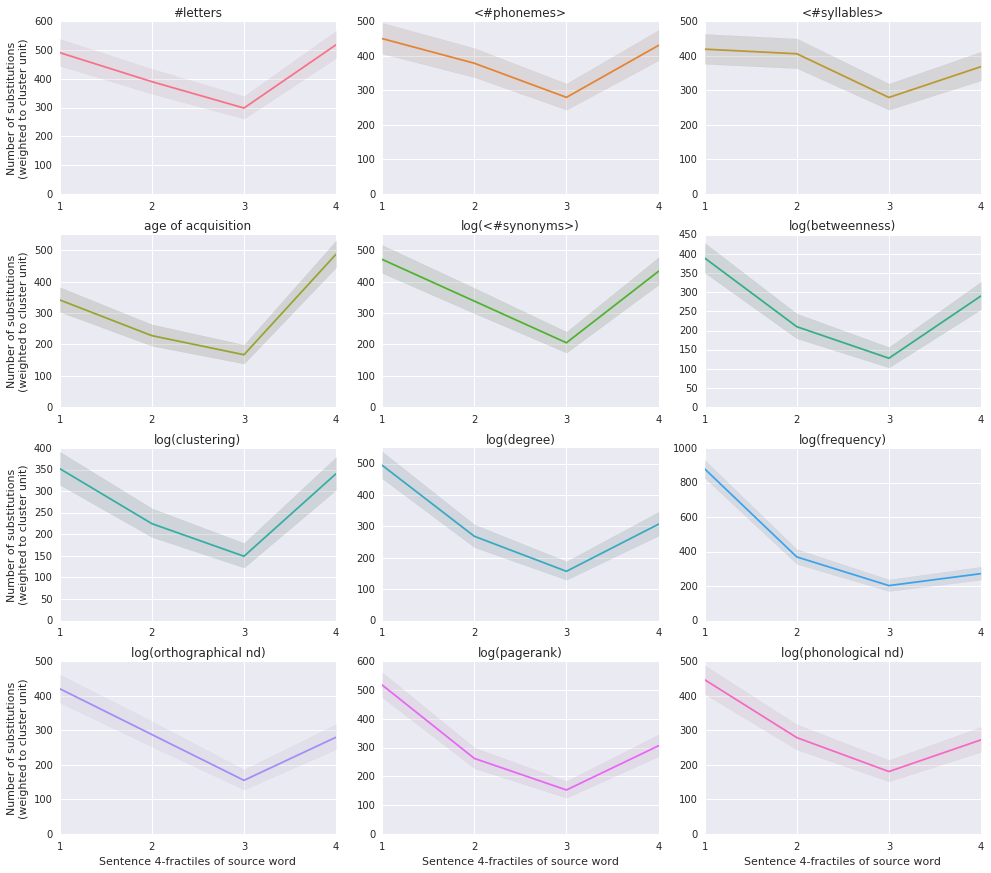

In [19]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

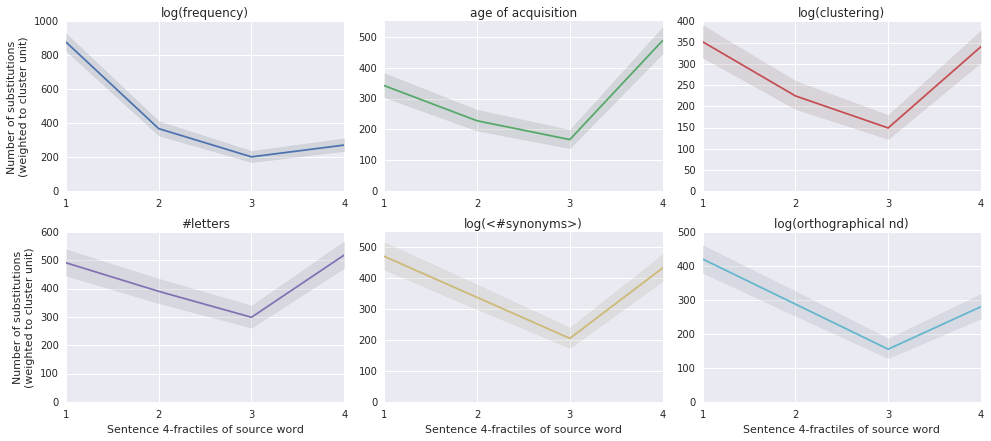

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)